In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import glob

from dateutil.relativedelta import relativedelta

import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
%matplotlib inline

In [2]:
years_full = [i for i in range(1980, 2023, 2)]
years = [str(i)[2:] for i in range(1980, 2023, 2)]
print(years)

['80', '82', '84', '86', '88', '90', '92', '94', '96', '98', '00', '02', '04', '06', '08', '10', '12', '14', '16', '18', '20', '22']


In [3]:
f1000 = pd.read_csv('Fortune1000/Fortune_1000.csv')

from unidecode import unidecode

def companies_from_sector(sector, topnum=5):
    companies = []
    print(sector, f1000[f1000['sector'] == sector].shape[0])
    for c_name in f1000[f1000['sector'] == sector]['company'][:topnum]:
        c_name = c_name.replace('-',' ')
        c_name = unidecode(c_name)
        c_name = c_name.replace(".",' ')
        c_name = c_name.replace("'",' ')
        c_name = c_name.replace("`",' ')
        c_name = c_name.replace("#8217;",' ')
        c_name = '&'.join(c_name.upper().split())
        if c_name == "AT&T":
            c_name = "ATT"
        if c_name == "COSTCO&WHOLESALE":
            c_name = "COSTCO"
        if c_name == "RAYTHEON&TECHNOLOGIES":
            c_name = "RAYTHEON"
        if c_name == "VERIZON&COMMUNICATIONS":
            c_name = "VERIZON"
        companies.append(c_name)
    return companies

companies_from_sector('Energy',10)

Energy 109


['EXXON&MOBIL',
 'CHEVRON',
 'MARATHON&PETROLEUM',
 'PHILLIPS&66',
 'VALERO&ENERGY',
 'ENERGY&TRANSFER',
 'WORLD&FUEL&SERVICES',
 'CONOCOPHILLIPS',
 'EXELON',
 'PLAINS&GP&HOLDINGS']

In [4]:
#GSS

gss = pd.read_excel('GSS.xlsx')

In [5]:
gss_years = np.unique(gss['year'])

In [6]:
gss = np.array(gss)

In [7]:
np.unique(gss[:,3])

array(['.d:  Do not Know/Cannot Choose', '.i:  Inapplicable',
       '.n:  No answer', '.s:  Skipped on Web', 'A GREAT DEAL',
       'HARDLY ANY', 'ONLY SOME'], dtype=object)

In [8]:
gss_leaning = -99*np.ones(len(gss))
gss_trust = -99*np.ones(len(gss))
gss_year = gss[:,0]

In [9]:
gss_leaning[gss[:,2] == 'Strong democrat'] = -3
gss_leaning[gss[:,2] == 'Not very strong democrat'] = -2
gss_leaning[gss[:,2] == 'Independent, close to democrat'] = -1
gss_leaning[gss[:,2] == 'Independent (neither, no response)'] = 0
gss_leaning[gss[:,2] == 'Independent, close to republican'] = 1
gss_leaning[gss[:,2] == 'Not very strong republican'] = 2
gss_leaning[gss[:,2] == 'Strong republican'] = 3

In [10]:
gss_trust[gss[:,3] == 'A GREAT DEAL'] = 2
gss_trust[gss[:,3] == 'ONLY SOME'] = 1
gss_trust[gss[:,3] == 'HARDLY ANY'] = 0

In [11]:
gss_sum_year = np.unique(gss_year)

In [12]:
gss_sum_year

array([1972, 1973, 1974, 1975, 1976, 1977, 1978, 1980, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1996, 1998,
       2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2021],
      dtype=object)

In [13]:
gss_sum_res = np.zeros([len(gss_sum_year), 4])
for i in range(len(gss_sum_year)):
    filt = (gss_year==gss_sum_year[i]) & \
           (gss_leaning>-50) & \
           (gss_trust>-50)
    temp = gss_trust[filt]
    gss_sum_res[i, 0] = np.sum(temp == 2) / len(temp)
    
    filt = (gss_year==gss_sum_year[i]) & \
           (gss_leaning>0) & \
           (gss_trust>-50)
    temp = gss_trust[filt]
    gss_sum_res[i, 1] = np.sum(temp == 2) / len(temp)
        
    filt = (gss_year==gss_sum_year[i]) & \
           (gss_leaning<-0) & \
           (gss_trust>-50)
    temp = gss_trust[filt]
    gss_sum_res[i, 2] = np.sum(temp == 2) / len(temp)
    
    filt = (gss_year==gss_sum_year[i]) & \
           (gss_leaning==0) & \
           (gss_trust>-50)
    temp = gss_trust[filt]
    gss_sum_res[i, 3] = np.sum(temp == 2) / len(temp)
    

C:\Users\h-desktop\AppData\Local\Temp\ipykernel_48764\4254176079.py:7: RuntimeWarning: invalid value encountered in long_scalars
  gss_sum_res[i, 0] = np.sum(temp == 2) / len(temp)
C:\Users\h-desktop\AppData\Local\Temp\ipykernel_48764\4254176079.py:13: RuntimeWarning: invalid value encountered in long_scalars
  gss_sum_res[i, 1] = np.sum(temp == 2) / len(temp)
C:\Users\h-desktop\AppData\Local\Temp\ipykernel_48764\4254176079.py:19: RuntimeWarning: invalid value encountered in long_scalars
  gss_sum_res[i, 2] = np.sum(temp == 2) / len(temp)
C:\Users\h-desktop\AppData\Local\Temp\ipykernel_48764\4254176079.py:25: RuntimeWarning: invalid value encountered in long_scalars
  gss_sum_res[i, 3] = np.sum(temp == 2) / len(temp)


In [14]:
filt = ~np.isnan(gss_sum_res[:,0])
gss_sum_year = gss_sum_year[filt]
gss_sum_res = gss_sum_res[filt, :]

(0.2, 0.7)

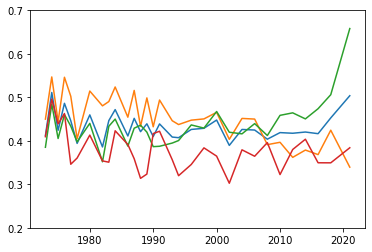

In [15]:
plt.plot(gss_sum_year, gss_sum_res)
plt.ylim([0.2, 0.7])

In [16]:
gss_sum_res

array([[0.41203704, 0.44988345, 0.38519448, 0.40944882],
       [0.5111465 , 0.546875  , 0.48462485, 0.49606299],
       [0.42421935, 0.44416873, 0.40536913, 0.43888889],
       [0.48621746, 0.54617414, 0.4605087 , 0.46276596],
       [0.44604317, 0.50235849, 0.43377886, 0.34615385],
       [0.39409222, 0.40486726, 0.39760638, 0.36040609],
       [0.45960366, 0.51442308, 0.44011544, 0.41314554],
       [0.38592233, 0.48043478, 0.3518335 , 0.35384615],
       [0.44647696, 0.49031008, 0.43354037, 0.35087719],
       [0.4717608 , 0.52380952, 0.45      , 0.42307692],
       [0.41111924, 0.45436508, 0.38787024, 0.39156627],
       [0.45169082, 0.51588785, 0.42901235, 0.35882353],
       [0.42105263, 0.43324251, 0.43595506, 0.31372549],
       [0.43913043, 0.4987013 , 0.42      , 0.32352941],
       [0.40987654, 0.43227666, 0.38659794, 0.41666667],
       [0.4388412 , 0.49376559, 0.387471  , 0.42201835],
       [0.40865892, 0.44619423, 0.39484979, 0.35652174],
       [0.40718563, 0.43741588,

# Processing data
It is very convenient to read all data once and save in a binary format. This way, next time we can read it much faster.

In [16]:
for year in years[:]:
    print(year)
    header_cm = pd.read_csv('data/cm_header_file.csv')
    df_cm = pd.read_csv('data/cm'+year+'/cm.txt', 
                     sep='|', 
                     names = header_cm.columns, 
                     header=0, 
                     keep_default_na=False)

    header_cn = pd.read_csv('data/cn_header_file.csv')
    df_cn = pd.read_csv('data/cn'+year+'/cn.txt', 
                     sep='|', 
                     names = header_cn.columns, 
                     header=0, 
                     keep_default_na=False)

    header = pd.read_csv('data/indiv_header_file.csv')
    
    part = 0
    
    for df in pd.read_csv('data/indiv'+year+'/itcont.txt', 
                     sep='|', 
                     names = header.columns, 
                     header=0, 
                     keep_default_na=False,
                     usecols = ['CMTE_ID', 'NAME', 'CITY','STATE','ZIP_CODE','TRANSACTION_AMT', 'EMPLOYER', 'OCCUPATION', 'TRANSACTION_DT'], 
                     chunksize=10000000):
        df["TRANSACTION_DT"] = df["TRANSACTION_DT"].astype(str) 
        df["ZIP_CODE"] = df["ZIP_CODE"].astype(str) 
        df['TRANSACTION_AMT'] = pd.to_numeric(df['TRANSACTION_AMT'], errors='coerce')
        df.to_parquet('data/indiv'+year+'/itcont_'+str(part)+'.parquet')
        df.reset_index(drop=True).to_feather('data/indiv'+year+'/itcont_'+str(part)+'.feather')
        part += 1


80


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [85]:
### all_subsample

res = []

for year in years[:]:
    print(year)
    header_cm = pd.read_csv('data/cm_header_file.csv')
    df_cm = pd.read_csv('data/cm'+year+'/cm.txt', 
                     sep='|', 
                     names = header_cm.columns, 
                     header=0, 
                     keep_default_na=False)

    header_cn = pd.read_csv('data/cn_header_file.csv')
    df_cn = pd.read_csv('data/cn'+year+'/cn.txt', 
                     sep='|', 
                     names = header_cn.columns, 
                     header=0, 
                     keep_default_na=False)

    header = pd.read_csv('data/indiv_header_file.csv')
    
    part = 0
    
    for f in glob.glob('data/indiv'+year+'/*parquet'):
        print(part)
        part += 1
        df = pd.read_parquet(f)
        
        df = pd.merge(df, df_cm, on='CMTE_ID')
       
        res.append(df[::100])

df_all = pd.concat(res, ignore_index=False)
df_all['TRANSACTION_DT'][df_all['TRANSACTION_DT']==''] = '111970'
df_all['DATE'] = [datetime.datetime.strptime(str(i), '%m%d%Y') for i in (df_all['TRANSACTION_DT']).astype(str)]
df_all.to_parquet('data/selections/sub_1_over_100_data.parquet')

80
0
82
0
84
0
86
0
88
0
90
0
92
0
94
0
96
0
98
0
00
0
02
0
04
0
06
0
08
0
10
0
12
0
14
0
16
0
1
2
18
0
1
2
20
0
1
2
3
4
5
6
7
8
9
22
0
1
2
3


ValueError: time data '' does not match format '%m%d%Y'

In [114]:
# df_all = pd.concat(res, ignore_index=False)
# df_all['TRANSACTION_DT'][df_all['TRANSACTION_DT']==''] = '111970'
# df_all['DATE'] = [datetime.datetime.strptime(str(i), '%m%d%Y') for i in (df_all['TRANSACTION_DT']).astype(str)]
# df_all.to_parquet('data/selections/sub_1_over_100_data.parquet')

C:\Users\h-desktop\AppData\Local\Temp\ipykernel_48764\3035779213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['TRANSACTION_DT'][df_all['TRANSACTION_DT']==''] = '111970'


In [4]:
res = []

for year in years[:]:
    print(year)
    header_cm = pd.read_csv('data/cm_header_file.csv')
    df_cm = pd.read_csv('data/cm'+year+'/cm.txt', 
                     sep='|', 
                     names = header_cm.columns, 
                     header=0, 
                     keep_default_na=False)

    header_cn = pd.read_csv('data/cn_header_file.csv')
    df_cn = pd.read_csv('data/cn'+year+'/cn.txt', 
                     sep='|', 
                     names = header_cn.columns, 
                     header=0, 
                     keep_default_na=False)

    header = pd.read_csv('data/indiv_header_file.csv')
    
    part = 0
    
    for f in glob.glob('data/indiv'+year+'/*parquet'):
        print(part)
        part += 1
        df = pd.read_parquet(f)
        
        df = pd.merge(df, df_cm, on='CMTE_ID')

        EMPLOYER_dict = ['Brown University', 'Columbia University', 'Cornell University', 'Dartmouth College', \
                         'Harvard University', 'University of Pennsylvania', 'Princeton University', 'Yale University']
        df = df[df['EMPLOYER'].str.contains("|".join(EMPLOYER_dict), 
                                     case = False)]
        
        res.append(df)

df_all = pd.concat(res, ignore_index=False)
df_all['DATE'] = [datetime.datetime.strptime(str(i), '%m%d%Y') for i in (df_all['TRANSACTION_DT']).astype(str)]
df_all.to_parquet('data/selections/ivy_league.parquet')

80
0
82
0
84
0
86
0
88
0
90
0
92
0
94
0
96
0
98
0
00
0
02
0
04
0
06
0
08
0
10
0
12
0
14
0
16
0
1


KeyboardInterrupt: 

In [ ]:
res = []

for year in years[:]:
    print(year)
    header_cm = pd.read_csv('data/cm_header_file.csv')
    df_cm = pd.read_csv('data/cm'+year+'/cm.txt', 
                     sep='|', 
                     names = header_cm.columns, 
                     header=0, 
                     keep_default_na=False)

    header_cn = pd.read_csv('data/cn_header_file.csv')
    df_cn = pd.read_csv('data/cn'+year+'/cn.txt', 
                     sep='|', 
                     names = header_cn.columns, 
                     header=0, 
                     keep_default_na=False)

    header = pd.read_csv('data/indiv_header_file.csv')
    
    part = 0
    
    for f in glob.glob('data/indiv'+year+'/*parquet'):
        print(part)
        part += 1
        df = pd.read_parquet(f)
        
        df = pd.merge(df, df_cm, on='CMTE_ID')

        EMPLOYER_dict = ['Ames Laboratory',
'Argonne National Laboratory', 'Argonne', 
'Brookhaven National Laboratory',
'Fermi National Accelerator Laboratory', 'Fermilab',
'Frederick National Laboratory for Cancer Research',
'Idaho National Laboratory',
'Lawrence Berkeley National Laboratory',
'Lawrence Livermore National Laboratory',
'Los Alamos National Laboratory',
'National Energy Technology Laboratory',
'National Renewable Energy Laboratory',
'Oak Ridge National Laboratory',
'Pacific Northwest National Laboratory',
'Princeton Plasma Physics Laboratory',
'Sandia National Laboratory',
'Savannah River National Laboratory',
'SLAC National Accelerator Laboratory',
'Thomas Jefferson National Accelerator Facility'
                        ]
        df = df[df['EMPLOYER'].str.contains("|".join(EMPLOYER_dict), 
                                     case = False)]
        
        res.append(df)
        
df_all = pd.concat(res, ignore_index=False)
df_all['DATE'] = [datetime.datetime.strptime(str(i), '%m%d%Y') for i in (df_all['TRANSACTION_DT']).astype(str)]
df_all.to_parquet('data/selections/nat_lab.parquet')

In [ ]:
res = []

cccu = np.genfromtxt('data/CCCU_governing_members.txt', delimiter = '\t', dtype=str)


for year in years[:]:
    print(year)
    header_cm = pd.read_csv('data/cm_header_file.csv')
    df_cm = pd.read_csv('data/cm'+year+'/cm.txt', 
                     sep='|', 
                     names = header_cm.columns, 
                     header=0, 
                     keep_default_na=False)

    header_cn = pd.read_csv('data/cn_header_file.csv')
    df_cn = pd.read_csv('data/cn'+year+'/cn.txt', 
                     sep='|', 
                     names = header_cn.columns, 
                     header=0, 
                     keep_default_na=False)

    header = pd.read_csv('data/indiv_header_file.csv')
    
    part = 0
    
    for f in glob.glob('data/indiv'+year+'/*parquet'):
        print(part)
        part += 1
        df = pd.read_parquet(f)
        
        df = pd.merge(df, df_cm, on='CMTE_ID')

        EMPLOYER_dict = cccu
        df = df[df['EMPLOYER'].str.contains("|".join(EMPLOYER_dict), 
                                     case = False)]
        
        res.append(df)
        
df_all = pd.concat(res, ignore_index=False)
df_all['DATE'] = [datetime.datetime.strptime(str(i), '%m%d%Y') for i in (df_all['TRANSACTION_DT']).astype(str)]
df_all.to_parquet('data/selections/cccu.parquet')

In [ ]:
res = []

for year in years[:]:
    print(year)
    header_cm = pd.read_csv('data/cm_header_file.csv')
    df_cm = pd.read_csv('data/cm'+year+'/cm.txt', 
                     sep='|', 
                     names = header_cm.columns, 
                     header=0, 
                     keep_default_na=False)

    header_cn = pd.read_csv('data/cn_header_file.csv')
    df_cn = pd.read_csv('data/cn'+year+'/cn.txt', 
                     sep='|', 
                     names = header_cn.columns, 
                     header=0, 
                     keep_default_na=False)

    header = pd.read_csv('data/indiv_header_file.csv')
    
    part = 0
    
    for f in glob.glob('data/indiv'+year+'/*parquet'):
        print(part)
        part += 1
        df = pd.read_parquet(f)
        
        df = pd.merge(df, df_cm, on='CMTE_ID')

        EMPLOYER_dict = ['college', 'university']
        df = df[df['EMPLOYER'].str.contains("|".join(EMPLOYER_dict), 
                                     case = False)]
        
        res.append(df)
        
df_all = pd.concat(res, ignore_index=False)
df_all['DATE'] = [datetime.datetime.strptime(str(i), '%m%d%Y') for i in (df_all['TRANSACTION_DT']).astype(str)]
df_all.to_parquet('data/selections/colleges_and_universities.parquet')

In [5]:
co

Energy 109


['EXXON&MOBIL',
 'CHEVRON',
 'MARATHON&PETROLEUM',
 'PHILLIPS&66',
 'VALERO&ENERGY',
 'ENERGY&TRANSFER',
 'WORLD&FUEL&SERVICES',
 'CONOCOPHILLIPS',
 'EXELON',
 'PLAINS&GP&HOLDINGS']

In [48]:
for sector in ['Energy', 'Technology']: #f1000['sector'].unique()[:]:
    res = []
    for year in years[:]:
        print(year)
        header_cm = pd.read_csv('data/cm_header_file.csv')
        df_cm = pd.read_csv('data/cm'+year+'/cm.txt', 
                         sep='|', 
                         names = header_cm.columns, 
                         header=0, 
                         keep_default_na=False)

        header_cn = pd.read_csv('data/cn_header_file.csv')
        df_cn = pd.read_csv('data/cn'+year+'/cn.txt', 
                         sep='|', 
                         names = header_cn.columns, 
                         header=0, 
                         keep_default_na=False)

        header = pd.read_csv('data/indiv_header_file.csv')

        part = 0

        for f in glob.glob('data/indiv'+year+'/*parquet'):
            print(part)
            part += 1
            df = pd.read_parquet(f)

            df = pd.merge(df, df_cm, on='CMTE_ID')

            EMPLOYER_dict = companies_from_sector(sector, 5)
            df = df[df['EMPLOYER'].str.contains("|".join(EMPLOYER_dict), 
                                         case = False)]

            res.append(df)
        
    df_all = pd.concat(res, ignore_index=False)
    df_all['DATE'] = [datetime.datetime.strptime(str(i), '%m%d%Y') for i in (df_all['TRANSACTION_DT']).astype(str)]
    df_all.to_parquet('data/selections/sector_5_' + sector + '.parquet')

80
0
Energy 109
82
0
Energy 109
84
0
Energy 109
86
0
Energy 109
88
0
Energy 109
90
0
Energy 109
92
0
Energy 109
94
0
Energy 109
96
0
Energy 109
98
0
Energy 109
00
0
Energy 109
02
0
Energy 109
04
0
Energy 109
06
0
Energy 109
08
0
Energy 109
10
0
Energy 109
12
0
Energy 109
14
0
Energy 109
16
0
Energy 109
1
Energy 109
2
Energy 109
18
0
Energy 109
1
Energy 109
2
Energy 109
20
0
Energy 109
1
Energy 109
2
Energy 109
3
Energy 109
4
Energy 109
5
Energy 109
6
Energy 109
7
Energy 109
8
Energy 109
9
Energy 109
22
0
Energy 109
1
Energy 109
80
0
Technology 109
82
0
Technology 109
84
0
Technology 109
86
0
Technology 109
88
0
Technology 109
90
0
Technology 109
92
0
Technology 109
94
0
Technology 109
96
0
Technology 109
98
0
Technology 109
00
0
Technology 109
02
0
Technology 109
04
0
Technology 109
06
0
Technology 109
08
0
Technology 109
10
0
Technology 109
12
0
Technology 109
14
0
Technology 109
16
0
Technology 109
1
Technology 109
2
Technology 109
18
0
Technology 109
1
Technology 109
2
Technology 10

In [63]:
for sector in ['Energy', 'Technology']: #f1000['sector'].unique()[:]:
    res = []
    for year in years[:]:
        print(year)
        header_cm = pd.read_csv('data/cm_header_file.csv')
        df_cm = pd.read_csv('data/cm'+year+'/cm.txt', 
                         sep='|', 
                         names = header_cm.columns, 
                         header=0, 
                         keep_default_na=False)

        header_cn = pd.read_csv('data/cn_header_file.csv')
        df_cn = pd.read_csv('data/cn'+year+'/cn.txt', 
                         sep='|', 
                         names = header_cn.columns, 
                         header=0, 
                         keep_default_na=False)

        header = pd.read_csv('data/indiv_header_file.csv')

        part = 0

        for f in glob.glob('data/indiv'+year+'/*parquet'):
            print(part)
            part += 1
            df = pd.read_parquet(f)

            df = pd.merge(df, df_cm, on='CMTE_ID')

            EMPLOYER_dict = companies_from_sector(sector, 20)
            df = df[df['EMPLOYER'].str.contains("|".join(EMPLOYER_dict), 
                                         case = False)]

            res.append(df)
        
    df_all = pd.concat(res, ignore_index=False)
    df_all['DATE'] = [datetime.datetime.strptime(str(i), '%m%d%Y') for i in (df_all['TRANSACTION_DT']).astype(str)]
    df_all.to_parquet('data/selections/sector_20_' + sector + '.parquet')

80
0
Energy 109
82
0
Energy 109
84
0
Energy 109
86
0
Energy 109
88
0
Energy 109
90
0
Energy 109
92
0
Energy 109
94
0
Energy 109
96
0
Energy 109
98
0
Energy 109
00
0
Energy 109
02
0
Energy 109
04
0
Energy 109
06
0
Energy 109
08
0
Energy 109
10
0
Energy 109
12
0
Energy 109
14
0
Energy 109
16
0
Energy 109
1
Energy 109
2
Energy 109
18
0
Energy 109
1
Energy 109
2
Energy 109
20
0
Energy 109
1
Energy 109
2
Energy 109
3
Energy 109
4
Energy 109
5
Energy 109
6
Energy 109
7
Energy 109
8
Energy 109
9
Energy 109
22
0
Energy 109
1
Energy 109
80
0
Technology 109
82
0
Technology 109
84
0
Technology 109
86
0
Technology 109
88
0
Technology 109
90
0
Technology 109
92
0
Technology 109
94
0
Technology 109
96
0
Technology 109
98
0
Technology 109
00
0
Technology 109
02
0
Technology 109
04
0
Technology 109
06
0
Technology 109
08
0
Technology 109
10
0
Technology 109
12
0
Technology 109
14
0
Technology 109
16
0
Technology 109
1
Technology 109
2
Technology 109
18
0
Technology 109
1
Technology 109
2
Technology 10

In [41]:
companies_from_sector('Energy')

Energy 109


['EXXON&MOBIL',
 'CHEVRON',
 'MARATHON&PETROLEUM',
 'PHILLIPS&66',
 'VALERO&ENERGY']

In [52]:
year='20'
df_cm = pd.read_csv('data/cm'+year+'/cm.txt', 
                     sep='|', 
                     names = header_cm.columns, 
                     header=0, 
                     keep_default_na=False)

df_cm[df_cm['CMTE_ID'] == 'C00401224']

,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
2662,C00401224,ACTBLUE,"HILL, ERIN",P.O. BOX 441146,,SOMERVILLE,MA,02144,U,V,,M,,,


In [47]:
df_cm[df_cm['CMTE_NM'] == 'ACTBLUE']

,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
2482,C00401224,ACTBLUE,"HILL, ERIN",PO BOX 441146,,SOMERVILLE,MA,02144,U,V,,M,,,


In [48]:
df_cm

,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN MR.","25 MASSACHUSETTS AVE, NW",SUITE 600,WASHINGTON,DC,200017400,B,Q,,M,M,ALABAMA MEDICAL PAC,
1,C00000489,D R I V E POLITICAL FUND CHAPTER 886,JERRY SIMS JR,3528 W RENO,,OKLAHOMA CITY,OK,73107,U,N,,Q,L,,
2,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,JERRY SLAUGHTER,623 SW 10TH AVE,,TOPEKA,KS,666121627,U,Q,UNK,Q,M,KANSAS MEDICAL SOCIETY,
3,C00000729,AMERICAN DENTAL ASSOCIATION POLITICAL ACTION C...,"FAIR, JULIAN H DR. III","1111 14TH STREET, NW",SUITE 1100,WASHINGTON,DC,200055627,B,Q,UNK,Q,M,INDIANA DENTAL PAC,
4,C00000885,INTERNATIONAL UNION OF PAINTERS AND ALLIED TRA...,"SMITH, GREGG",7234 PARKWAY DRIVE,,HANOVER,MD,21076,B,Q,UNK,M,L,INTERNATIONAL UNION OF PAINTERS AND ALLIED TRADES,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16786,C90021197,CENTER FOR CIVIC INFORMATION,,PO BOX 15845,,WASHINGTON,DC,20003,U,I,,Q,,,
16787,C90021205,AKRON CHAPTER OF THE DEMOCRATIC SOCIALISTS OF ...,,PO BOX 26702,,AKRON,OH,44319,U,I,,Q,,,
16788,C90021221,"KALB, STACEY WOLFE",,84 COMPASS AVENUE,,BEACHWOOD,NJ,08722,U,I,,Q,,,
16789,C90021239,"COMMITEE 300, AKHLAGHY",,67 WALLST,,NEW YORK,NY,10005,U,I,,Q,,,


In [ ]:
C00401224

In [164]:
df_all = pd.concat(res, ignore_index=False)

In [166]:
df_all[df_all['CMTE_PTY_AFFILIATION'] == '']['CMTE_NM'].describe()

count        9845
unique        113
top       ACTBLUE
freq         5863
Name: CMTE_NM, dtype: object

In [ ]:
1

In [168]:
# df_all.set_index('DATE', inplace=True)

In [169]:
# df_all.sort_index()

In [17]:



temp = [datetime.datetime(1980,1,1) + relativedelta(months=i) for i in np.arange(0,12*10+1,24)]
temp += [temp[-1] + relativedelta(months=i) for i in np.arange(12,12*10+1,12)]
temp += [temp[-1] + relativedelta(months=i) for i in np.arange(6,12*10+1,6)]
temp += [temp[-1] + relativedelta(months=i) for i in np.arange(3,12*20+1,3)]

bins = np.array(temp, dtype='datetime64')

In [18]:

# for f in range(0, 4):
#     df_all = pd.read_parquet(files[f])

In [ ]:
!dir data/selections/su

In [94]:
# OCCUPATION_dict = ['ADMINISTRATOR']
# df_all[df_all['OCCUPATION'].str.contains("|".join(OCCUPATION_dict), 
#                                          case = False)]

In [95]:
# df_all[df_all['OCCUPATION'].str.contains("|".join(OCCUPATION_dict), 
#                                          case = False)]

In [96]:
# df_all

In [97]:
# OCCUPATION_dict = ['professor', 'faculty', 'SCIENTIST', 'LECTURER']
# df_all_2 = df_all[df_all['OCCUPATION'].str.contains("|".join(OCCUPATION_dict), 
#                                          case = False)]

In [98]:
# df_all_2['TRANSACTION_AMT'].sum() / df_all['TRANSACTION_AMT'].sum()

In [99]:
# df_all.groupby(by = ['OCCUPATION'])['TRANSACTION_AMT'].sum().sort_values()[-30:]

In [100]:
# x = df_all.groupby(by = ['CMTE_PTY_AFFILIATION'])['TRANSACTION_AMT'].sum().sort_values()

In [101]:
# plt.style.use('bmh')

# fig, ax = plt.subplots(figsize=(6, 4), constrained_layout=True,dpi = 200)


# labels = ['All colleges and\nuniversities employees', 'All professoriate', 'Council for Christian\nColleges & Universities professoriate', 'Ivy League professoriate', 'National Labs']
# a = [0.3, 1,1,1]

# for f in range(4):
#     plt.plot(xx[f], yy[f], label=labels[f], alpha=a[f])

    

# ax.annotate("Clinton\nelected", xy=(datetime.datetime(1992,11,4), 0.65), xytext=(0, 50),
#             arrowprops=dict(arrowstyle="-", lw=2, color='k'), textcoords="offset points", 
#                 horizontalalignment="center",
#                 verticalalignment="bottom")
# ax.annotate("", xy=(datetime.datetime(1996,11,4), 0.60), xytext=(0, 50),
#             arrowprops=dict(arrowstyle="-", lw=2, color='k', linestyle = '--',), textcoords="offset points", 
#                 horizontalalignment="center",
#                 verticalalignment="bottom")

# ax.annotate("G.W. Bush\nelected", xy=(datetime.datetime(2000,11,4), 0.65), xytext=(0, 50),
#             arrowprops=dict(arrowstyle="-", lw=2, color='k'), textcoords="offset points", 
#                 horizontalalignment="center",
#                 verticalalignment="bottom")
# ax.annotate("", xy=(datetime.datetime(2004,11,4), 0.60), xytext=(0, 50),
#             arrowprops=dict(arrowstyle="-", lw=2, color='k', linestyle = '--',), textcoords="offset points", 
#                 horizontalalignment="center",
#                 verticalalignment="bottom")

# ax.annotate("Obama\nelected", xy=(datetime.datetime(2008,11,4), 0.5), xytext=(0, 50),
#             arrowprops=dict(arrowstyle="-", lw=2, color='k'), textcoords="offset points", 
#                 horizontalalignment="center",
#                 verticalalignment="bottom")
# ax.annotate("", xy=(datetime.datetime(2012,11,4), 0.4), xytext=(0, 50),
#             arrowprops=dict(arrowstyle="-", lw=2, color='k', linestyle = '--',), textcoords="offset points", 
#                 horizontalalignment="center",
#                 verticalalignment="bottom")


# ax.annotate("Trump\nelected", xy=(datetime.datetime(2016,11,6), 0.3), xytext=(0, 50),
#             arrowprops=dict(arrowstyle="-", lw=2, color='k'), textcoords="offset points", 
#                 horizontalalignment="center",
#                 verticalalignment="bottom")

# ax.annotate("Biden\nelected", xy=(datetime.datetime(2020,11,6), 0.2), xytext=(0, 50),
#             arrowprops=dict(arrowstyle="-", lw=2, color='k'), textcoords="offset points", 
#                 horizontalalignment="center",
#                 verticalalignment="bottom")

# plt.ylim([0,1])
# plt.xticks([datetime.datetime(1980,1,1) + i * relativedelta(months=48) for i in np.arange(0,11)],
#           [str(i) for i in np.arange(1980,2022,4)])
# plt.xlim([datetime.datetime(1980,1,1), datetime.datetime(2022,1,1)])

# plt.ylabel('Fraction of donations to \n the republican candidates and organizations')
# plt.xlabel('Year')


# #---

# temp = [datetime.datetime(1980,1,1) + relativedelta(months=i) for i in np.arange(0,12*26+1,12)]
# temp += [temp[-1] + relativedelta(months=i) for i in np.arange(24,12*50+1,6)]

# bins = np.array(temp, dtype='datetime64')

# H,X =np.histogram(z['DATE'], weights = np.array(z['TRANSACTION_AMT']).astype(float),density=True,
#                  bins = bins)

# plt.fill_between(X[:-1]+np.diff(X)/2., H*1e6, step="pre", alpha=1, facecolor='k', label='Volume')
# # plt.step(X[:-1]+np.diff(X)/2., H/3.5e7,c='k')

# #---

In [163]:
files = ['data/selections/colleges_and_universities.parquet',
         'data/selections/colleges_and_universities.parquet',
         'data/selections/colleges_and_universities.parquet',
         'data/selections/colleges_and_universities.parquet',
          'data/selections/cccu.parquet',
          'data/selections/ivy_league.parquet',
          'data/selections/nat_lab.parquet',
        'data/selections/sub_1_over_100_data.parquet']

# labels = ['All colleges and universities', 'Council for Christian Colleges & Universities', 'Ivy League', 'National Labs']

xx = []
yy = []
yy2 = []
yy3 = []

for f in range(0, 8):
    df_all = pd.read_parquet(files[f])

    df_all = df_all.reset_index(drop=True)
    df_all = df_all.drop(df_all.index[df_all['TRANSACTION_DT'] == 'FL'])
    df_all = df_all.drop(df_all.index[df_all['TRANSACTION_DT'] == ''])

    if f==1:
        OCCUPATION_dict = ['PRESIDENT']
        df_all = df_all[df_all['OCCUPATION'].str.contains("|".join(OCCUPATION_dict), 
                                         case = False)]
    elif f==2:
        OCCUPATION_dict = ['ADMINISTRATOR']
        df_all = df_all[df_all['OCCUPATION'].str.contains("|".join(OCCUPATION_dict), 
                                         case = False)]
    elif (f>2) and (f<7):
        OCCUPATION_dict = ['professor', 'faculty', 'SCIENTIST', 'LECTURER']
        df_all = df_all[df_all['OCCUPATION'].str.contains("|".join(OCCUPATION_dict), 
                                         case = False)]
        
    df_all['DATE'] = [datetime.datetime.strptime(str(i), '%m%d%Y') for i in (df_all['TRANSACTION_DT']).astype(str)]

    df_all = df_all.sort_values(by=['DATE'])

    df_all.loc[df_all['CMTE_NM'] == 'ACTBLUE', 'CMTE_PTY_AFFILIATION'] = 'DEM'
    df_all.loc[df_all['CMTE_NM'] == 'MOVEON.ORG POLITICAL ACTION', 'CMTE_PTY_AFFILIATION'] = 'DEM'

    if f in [0, 1, 3]:
        bins = df_all[df_all['CMTE_PTY_AFFILIATION'] == 'REP']['DATE'][::1000]
    elif f == 7:
        temp = [datetime.datetime(1980,1,1) + relativedelta(months=i) for i in np.arange(0,12*10+1,24)]
        temp += [temp[-1] + relativedelta(months=i) for i in np.arange(12,12*10+1,12)]
        temp += [temp[-1] + relativedelta(months=i) for i in np.arange(6,12*10+1,6)]
        temp += [temp[-1] + relativedelta(months=i) for i in np.arange(3,12*20+1,3)]

        bins = np.array(temp, dtype='datetime64')
#         bins = df_all[df_all['CMTE_PTY_AFFILIATION'] == 'REP']['DATE'][::1000]
    else:
        bins = df_all[df_all['CMTE_PTY_AFFILIATION'] == 'REP']['DATE'][::50]
    
#     if f==2:
#         bins = df_all[df_all['CMTE_PTY_AFFILIATION'] == 'REP']['DATE'][::50]
    
    bins = np.array(bins)

    H_DEM,X = np.histogram(df_all['DATE'][df_all['CMTE_PTY_AFFILIATION'] == 'DEM'], 
                           weights = np.array(df_all['TRANSACTION_AMT'][df_all['CMTE_PTY_AFFILIATION'] == 'DEM']).astype(float),
                bins = bins)

    H_REP,X = np.histogram(df_all['DATE'][df_all['CMTE_PTY_AFFILIATION'] == 'REP'], 
                           weights = np.array(df_all['TRANSACTION_AMT'][df_all['CMTE_PTY_AFFILIATION'] == 'REP']).astype(float),
                 bins = bins)
    
    H_OTH,X = np.histogram(df_all['DATE'][(df_all['CMTE_PTY_AFFILIATION'] != 'REP') & 
                                          (df_all['CMTE_PTY_AFFILIATION'] != 'DEM') & 
                                          (df_all['CMTE_PTY_AFFILIATION'] != '') 
                                         ], 
                           weights = np.array(df_all['TRANSACTION_AMT'][(df_all['CMTE_PTY_AFFILIATION'] != 'REP') & 
                                                                          (df_all['CMTE_PTY_AFFILIATION'] != 'DEM') & 
                                                                          (df_all['CMTE_PTY_AFFILIATION'] != '') ]).astype(float),
                 bins = bins)

    d_bins = (bins[1:] - bins[:-1]) / np.timedelta64(1, 'D')

    
    if f==0:
        z = df_all.copy()
    
    # ax = plt.subplot(211)
    # plt.plot(X[1:],H_DEM/d_bins,'b')
    # plt.plot(X[1:],H_REP/d_bins,'r')
    # plt.xlim([datetime.datetime(1980,1,1), datetime.datetime(2022,1,1)])
    # # plt.ylim([0,1.2e6])
    # plt.yscale('log')
    # plt.grid()

    # plt.subplot(212, sharex=ax, )

    xx.append(X[:-1]+np.diff(X)/2.)
    yy.append(H_REP / (H_REP + H_DEM + H_OTH))
    yy2.append(H_DEM / (H_REP + H_DEM + H_OTH))
    yy3.append(H_OTH / (H_REP + H_DEM + H_OTH))



C:\Users\h-desktop\AppData\Local\Temp\ipykernel_48764\1669551081.py:96: RuntimeWarning: invalid value encountered in true_divide
  yy.append(H_REP / (H_REP + H_DEM + H_OTH))
C:\Users\h-desktop\AppData\Local\Temp\ipykernel_48764\1669551081.py:97: RuntimeWarning: invalid value encountered in true_divide
  yy2.append(H_DEM / (H_REP + H_DEM + H_OTH))
C:\Users\h-desktop\AppData\Local\Temp\ipykernel_48764\1669551081.py:98: RuntimeWarning: invalid value encountered in true_divide
  yy3.append(H_OTH / (H_REP + H_DEM + H_OTH))


In [164]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [165]:
H_DEM

array([  519193.,   469463.,   630095.,   893379.,  1081504.,   487242.,
         465609.,  1171959.,   384700.,   777357.,   615678.,  1371906.,
         545117.,   894288.,  1220762.,   675715.,  1615266.,   391035.,
         485498.,   784000.,   833441.,  1003901.,  1194705.,  2896901.,
        2606433.,   758757.,   794730.,  1411231.,  2111243.,  2535948.,
        2274392.,  3417720.,  3837345.,  1197443.,  1457685.,   761607.,
         847532.,  1234765.,  1019315.,   486058.,   836980.,   655054.,
         835034.,   919432.,  1367599.,  1863114.,  1244238.,   551998.,
         810941.,   547357.,   652270.,   967380.,  1120525.,  1448312.,
         880732.,   811916.,  1436869.,  1261531.,  1610079.,  1991400.,
        3053946.,  3930065.,  4175693.,   973454.,  1362746.,  1425728.,
        1943854.,  1731812.,  3169792.,  4968000.,  3758633.,  1685262.,
        2666644.,  3322752.,  5705522.,  4296580.,  5139564., 14703011.,
       26997062.,  1530329.,  2564912.,  2883978., 

In [166]:
def add_presidents(ax, old=True):
    alphax=0.6
    if old:
        ax.annotate("G.H.W. Bush\nelected", xy=(datetime.datetime(1984,11,4), 0.425), xytext=(0, 30),
                     bbox=dict(boxstyle="round", alpha=alphax, fc='w',ec='w'),
                    arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '-',), textcoords="offset points", 
                     horizontalalignment="center",
                     verticalalignment="bottom")
        ax.annotate("", xy=(datetime.datetime(1988,11,4), 0.425), xytext=(0, 30),
                     bbox=dict(boxstyle="round", alpha=alphax, fc='w',ec='k'),
                    arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                        horizontalalignment="center",
                        verticalalignment="bottom")


        ax.annotate("Clinton\nelected", xy=(datetime.datetime(1992,11,4), 0.425), xytext=(0, 30),
                     bbox=dict(boxstyle="round", alpha=alphax, fc='w',ec='w'),
                    arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '-',), textcoords="offset points", 
                     horizontalalignment="center",
                     verticalalignment="bottom")
        ax.annotate("", xy=(datetime.datetime(1996,11,4), 0.425), xytext=(0, 30),
                     bbox=dict(boxstyle="round", alpha=alphax, fc='w',ec='k'),
                    arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                        horizontalalignment="center",
                        verticalalignment="bottom")

    ax.annotate("G.W. Bush\nelected", xy=(datetime.datetime(2000,11,4), 0.425), xytext=(0, 30),
                 bbox=dict(boxstyle="round", alpha=alphax, fc='w',ec='w'),
                arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '-',), textcoords="offset points", 
                 horizontalalignment="center",
                 verticalalignment="bottom")
    ax.annotate("", xy=(datetime.datetime(2004,11,4), 0.425), xytext=(0, 30),
                 bbox=dict(boxstyle="round", alpha=alphax, fc='w',ec='k'),
                arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                    horizontalalignment="center",
                    verticalalignment="bottom")

    ax.annotate("Obama\nelected", xy=(datetime.datetime(2008,11,4), 0.425), xytext=(0, 30),
                 bbox=dict(boxstyle="round", alpha=alphax, fc='w',ec='w'),
                arrowprops=dict(arrowstyle="-", lw=1, color='k'), textcoords="offset points", 
                    horizontalalignment="center",
                    verticalalignment="bottom")
    ax.annotate("", xy=(datetime.datetime(2012,11,4), 0.425), xytext=(0, 30),
                 bbox=dict(boxstyle="round", alpha=alphax, fc='w',ec='k'),
                arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                    horizontalalignment="center",
                    verticalalignment="bottom")


    ax.annotate("Trump\nelected", xy=(datetime.datetime(2016,11,6), 0.425), xytext=(0, 30),
                 bbox=dict(boxstyle="round", alpha=alphax, fc='w',ec='w'),
                arrowprops=dict(arrowstyle="-", lw=1, color='k'), textcoords="offset points", 
                    horizontalalignment="center",
                    verticalalignment="bottom")

    ax.annotate("Biden\nelected", xy=(datetime.datetime(2020,11,6), 0.425), xytext=(0, 30),
                 bbox=dict(boxstyle="round", alpha=alphax, fc='w',ec='w'),
                arrowprops=dict(arrowstyle="-", lw=1, color='k'), textcoords="offset points", 
                    horizontalalignment="center",
                    verticalalignment="bottom")

0
2
3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


3
4
5


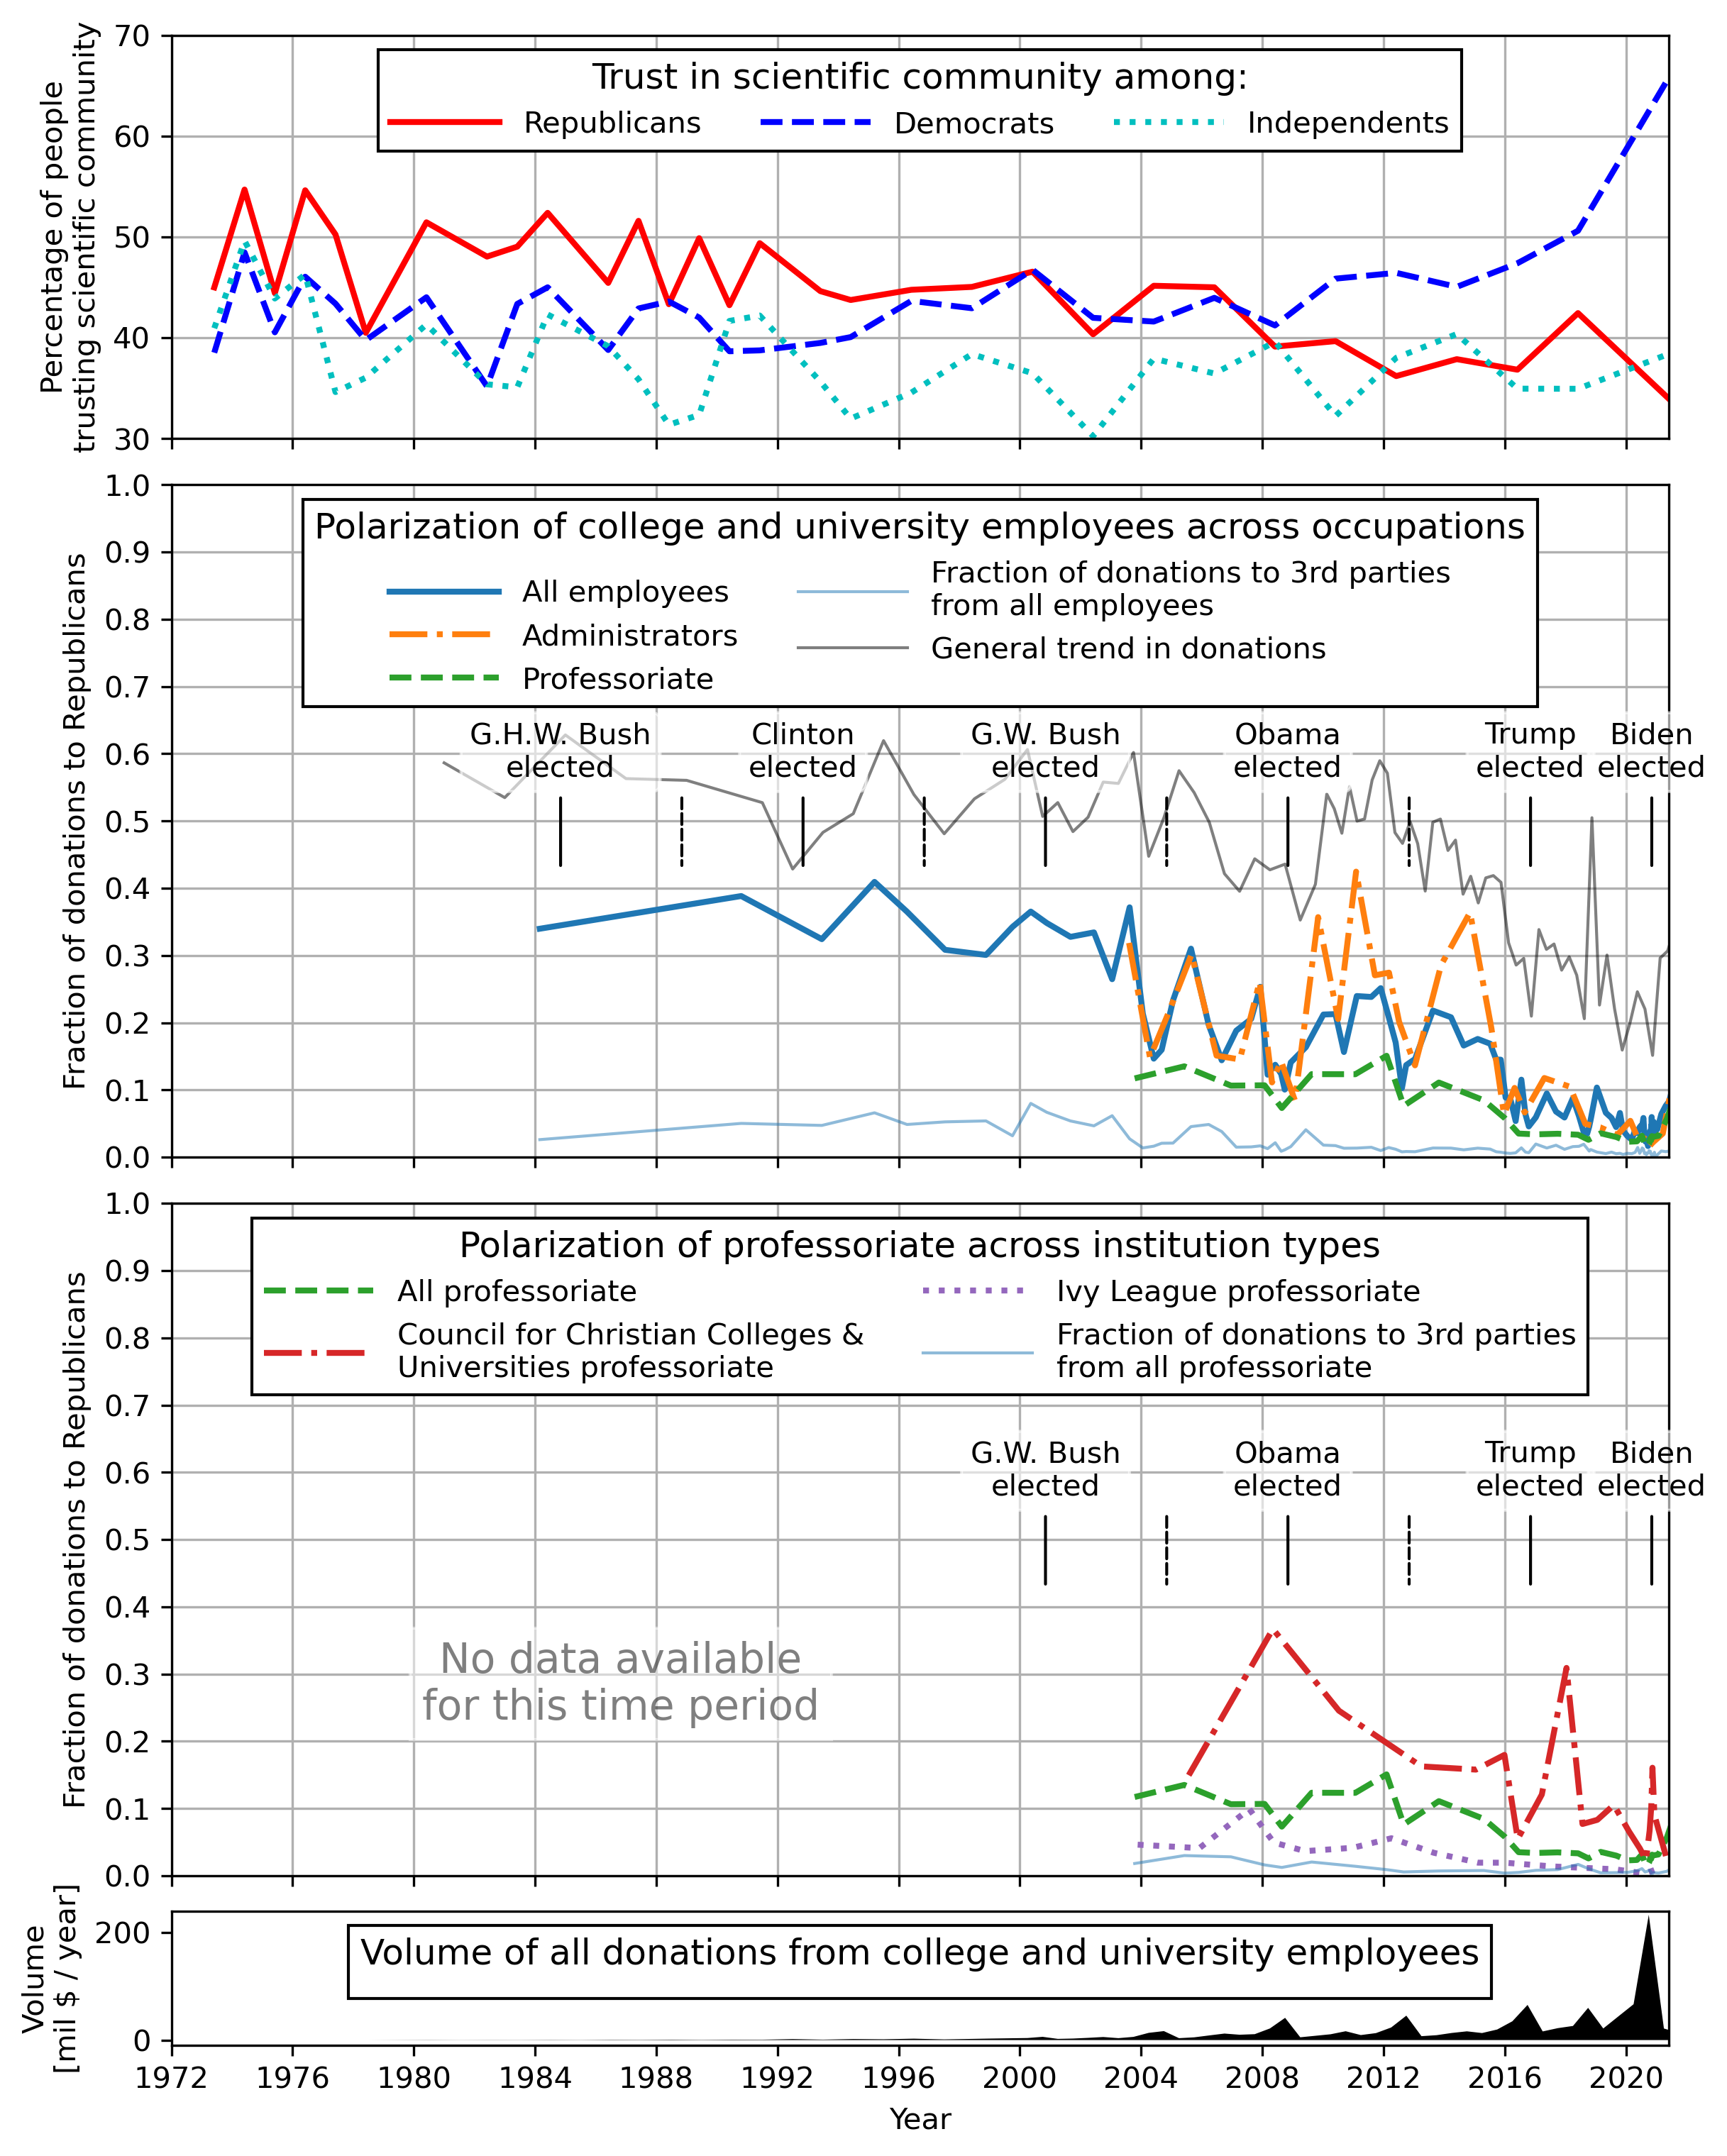

In [168]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

plt.rcParams['axes.facecolor']='white'

def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(figsize=(8,10), constrained_layout=True, dpi=300)

gs = GridSpec(4, 1, height_ratios=[3, 5, 5, 1], figure=fig)

ax = fig.add_subplot(gs[0])

ax.plot([datetime.datetime(i,6,1) for i in gss_sum_year], gss_sum_res[:,1]*100, '-r', lw=2, label='Republicans')
ax.plot([datetime.datetime(i,6,1) for i in gss_sum_year], gss_sum_res[:,2]*100, '--b', lw=2, label='Democrats')
ax.plot([datetime.datetime(i,6,1) for i in gss_sum_year], gss_sum_res[:,3]*100, ':c', lw=2, label='Independents')

plt.legend(loc='upper center', facecolor=(1, 1, 1, 1), prop={'size': 10}, handlelength = 3.7, ncol=3, 
           title='Trust in scientific community among:', fancybox=False, framealpha=1, edgecolor='0',
          title_fontproperties = {'size': 12})

plt.ylim([30, 70])
plt.yticks([30,40,50,60,70])

plt.grid()


yearstart=1972

plt.xlim([datetime.datetime(yearstart,1,1), datetime.datetime(2021,6,1)])
plt.xticks([datetime.datetime(yearstart,1,1) + i * relativedelta(months=48) 
            for i in np.arange(0,len(np.arange(yearstart,2022,4)))],
          ["" for i in np.arange(yearstart,2022,4)])


plt.ylabel('Percentage of people\ntrusting scientific community')


ax = fig.add_subplot(gs[1])
labels = ['All employees', 
          'All colleges and universities \npresidents', 
          'Administrators', 
          'Professoriate', 
          'Council for Christian Colleges &\nUniversities professoriate', 
          'Ivy League professoriate', 
          'National Labs',
          '']

a = [1, 1, 1, 1, 1, 1]
line_style = ['-','-','-.', '--', '-.', ':']

colors_s = [0,0,1,2,3,4]

for f in [0,2,3]:#2, 3,4,5]:
    print(f)
    plt.plot(xx[f], yy[f], line_style[f], label=labels[f], alpha=a[f], color=colors[colors_s[f]], lw=2)

plt.plot(xx[0], yy3[0], '-', lw=1, label="Fraction of donations to 3rd parties\nfrom all employees", alpha=0.5)

plt.plot(xx[7], yy[7], 'k-', lw=1, label="General trend in donations", alpha=0.5)

plt.yticks(np.arange(0,1.01,0.1))
plt.ylim([0,1])
plt.xticks([datetime.datetime(yearstart,1,1) + i * relativedelta(months=48) 
            for i in np.arange(0,len(np.arange(yearstart,2022,4)))],
          ["" for i in np.arange(yearstart,2022,4)])

plt.xlim([datetime.datetime(yearstart,1,1), datetime.datetime(2021,6,1)])
plt.ylabel('Fraction of donations to Republicans')
add_presidents(ax)
plt.grid()
plt.legend(loc='upper center', facecolor=(1, 1, 1, 1), prop={'size': 10}, handlelength = 3.7, ncol=2,
          title='Polarization of college and university employees across occupations', fancybox=False, framealpha=1, edgecolor='0',
          title_fontproperties = {'size': 12})



ax = fig.add_subplot(gs[2])
labels = ['All colleges and universities\nemployees', 
          'All colleges and universities presidents', 
          'All colleges and universities\nadministrators', 
          'All professoriate', 
          'Council for Christian Colleges &\nUniversities professoriate', 
          'Ivy League professoriate', 'National Labs']

a = [1, 1, 1, 1, 1, 1]
line_style = ['-','-','-', '--', '-.', ':']
for f in [3,4,5]:#2, 3,4,5]:
    print(f)
    plt.plot(xx[f], yy[f], line_style[f], label=labels[f], alpha=a[f], color=colors[colors_s[f]], lw=2)

plt.plot(xx[3], yy3[3], '-', lw=1, label="Fraction of donations to 3rd parties\nfrom all professoriate", alpha=0.5)
plt.yticks(np.arange(0,1.01,0.1))
plt.ylim([0,1])
plt.xticks([datetime.datetime(yearstart,1,1) + i * relativedelta(months=48) 
            for i in np.arange(0,len(np.arange(yearstart,2022,4)))],
          ["" for i in np.arange(yearstart,2022,4)])

plt.xlim([datetime.datetime(yearstart,1,1), datetime.datetime(2021,6,1)])
plt.ylabel('Fraction of donations to Republicans')
add_presidents(ax, old=False)
plt.grid()
plt.legend(loc='upper center', facecolor=(1, 1, 1, 1), prop={'size': 10}, handlelength = 3.7, ncol=2,
          title='Polarization of professoriate across institution types', fancybox=False, framealpha=1, edgecolor='0',
          title_fontproperties = {'size': 12})


props = dict(boxstyle=None, facecolor='white', edgecolor='white', alpha=0.5)
ax.text(0.3, 0.35, "No data available\nfor this time period", transform=ax.transAxes, fontsize=14,
        verticalalignment='top',horizontalalignment='center', bbox=props,alpha=0.5)


# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[3])


temp = [datetime.datetime(yearstart,1,1) + relativedelta(months=i) for i in np.arange(0,12*26+1,12)]
temp += [temp[-1] + relativedelta(months=i) for i in np.arange(24,12*50+1,6)]

bins = np.array(temp, dtype='datetime64')

H,X =np.histogram(z['DATE'], weights = np.array(z['TRANSACTION_AMT']).astype(float),
                 bins = bins)

plt.fill_between(X[:-1]+np.diff(X)/2., H /1e6 / (np.diff(X.astype(float))/3600/24/1e6/365),
                 alpha=1, facecolor='k')
# plt.yscale('log')


plt.xticks([datetime.datetime(yearstart,1,1) + i * relativedelta(months=48) 
            for i in np.arange(0,len(np.arange(yearstart,2022,4)))],
          [str(i) for i in np.arange(yearstart,2022,4)])

plt.xlim([datetime.datetime(yearstart,1,1), datetime.datetime(2021,6,1)])
plt.ylim([-10,240])
# fig.suptitle("GridSpec")
# format_axes(fig)

plt.xlabel('Year')
plt.ylabel('Volume\n[mil $ / year]')

plt.legend(loc='upper center', facecolor=(1, 1, 1, 1), prop={'size': 10}, handlelength = 3.7, ncol=2,
          title='Volume of all donations from college and university employees', fancybox=False, framealpha=1, edgecolor='0',
          title_fontproperties = {'size': 12})

plt.show()

# plt.step(X[:-1]+np.diff(X)/2., H/3.5e7,c='k')

In [151]:
# t = np.array(z['TRANSACTION_AMT']).astype(float)
# t=t[t>0]
# t=t[t<1e4]
# _ = plt.hist(t,100)


In [134]:
# t[t<100].sum()

In [135]:
# plt.figure(dpi=200)

# files = ['data/selections/sector_Energy.parquet',
#          'data/selections/sector_Technology.parquet']

# labels = ['Energy', 'Technology']

# for f in range(2):
#     df_all = pd.read_parquet(files[f])

#     df_all = df_all.reset_index(drop=True)
#     df_all = df_all.drop(df_all.index[df_all['TRANSACTION_DT'] == 'FL'])
#     df_all = df_all.drop(df_all.index[df_all['TRANSACTION_DT'] == ''])

#     df_all['DATE'] = [datetime.datetime.strptime(str(i), '%m%d%Y') for i in (df_all['TRANSACTION_DT']).astype(str)]

#     df_all = df_all.sort_values(by=['DATE'])

#     df_all.loc[df_all['CMTE_NM'] == 'ACTBLUE', 'CMTE_PTY_AFFILIATION'] = 'DEM'
#     df_all.loc[df_all['CMTE_NM'] == 'MOVEON.ORG POLITICAL ACTION', 'CMTE_PTY_AFFILIATION'] = 'DEM'


#     bins = df_all[df_all['CMTE_PTY_AFFILIATION'] == 'REP']['DATE'][::100]
#     bins = np.array(bins)

#     H_DEM,X = np.histogram(df_all['DATE'][df_all['CMTE_PTY_AFFILIATION'] == 'DEM'], weights = np.array(df_all['TRANSACTION_AMT'][df_all['CMTE_PTY_AFFILIATION'] == 'DEM']).astype(float),
#                 bins = bins)

#     H_REP,X = np.histogram(df_all['DATE'][df_all['CMTE_PTY_AFFILIATION'] == 'REP'], weights = np.array(df_all['TRANSACTION_AMT'][df_all['CMTE_PTY_AFFILIATION'] == 'REP']).astype(float),
#                  bins = bins)

#     d_bins = (bins[1:] - bins[:-1]) / np.timedelta64(1, 'D')

    
#     # ax = plt.subplot(211)
#     # plt.plot(X[1:],H_DEM/d_bins,'b')
#     # plt.plot(X[1:],H_REP/d_bins,'r')
#     # plt.xlim([datetime.datetime(1980,1,1), datetime.datetime(2022,1,1)])
#     # # plt.ylim([0,1.2e6])
#     # plt.yscale('log')
#     # plt.grid()

#     # plt.subplot(212, sharex=ax, )

    
#     plt.plot(X[:-1]+np.diff(X)/2., H_REP / (H_REP + H_DEM), label=labels[f])

# plt.ylim([0,1])
# plt.xticks([datetime.datetime(1980,1,1) + i * relativedelta(months=48) for i in np.arange(0,11)],
#           [str(i) for i in np.arange(1980,2022,4)])
# plt.xlim([datetime.datetime(1980,1,1), datetime.datetime(2022,1,1)])

# plt.ylabel('Fraction of donations to \n the republican candidates and organizations')

# plt.legend()

In [155]:

files = ['data/selections/sector_10_Energy.parquet',
         'data/selections/sector_10_Technology.parquet',
         'data/selections/sub_1_over_100_data.parquet']


files_read = []

labels = ['All Energy sector', 'Scientists within Energy sector', 'Executives and managers within Energy sector']

xx2=[]
yy2=[]

for f in files:
    df_all = pd.read_parquet(f)
        
    df_all = df_all.reset_index(drop=True)
    df_all = df_all.drop(df_all.index[df_all['TRANSACTION_DT'] == 'FL'])
    df_all = df_all.drop(df_all.index[df_all['TRANSACTION_DT'] == ''])

    df_all['DATE'] = [datetime.datetime.strptime(str(i), '%m%d%Y') for i in (df_all['TRANSACTION_DT']).astype(str)]

    df_all = df_all.sort_values(by=['DATE'])
    
    df_all.loc[df_all['CMTE_NM'] == 'ACTBLUE', 'CMTE_PTY_AFFILIATION'] = 'DEM'
    df_all.loc[df_all['CMTE_NM'] == 'MOVEON.ORG POLITICAL ACTION', 'CMTE_PTY_AFFILIATION'] = 'DEM'
    
    files_read.append(df_all.copy())

In [160]:
temp = [datetime.datetime(1986,11,6) + relativedelta(months=i) for i in np.arange(0,12*20+1,48)]
temp += [temp[-1] + relativedelta(months=i) for i in np.arange(24,12*50+1,24)]

bins = np.array(temp, dtype='datetime64')

labels = ['All Energy sector', 'Scientists within Energy sector', 'Executives and managers within Energy sector']

xx2=[]
yy2=[]

for f in range(5):
    if f<3:
        df_all = files_read[0].copy()
    elif f==3:
        df_all = files_read[1].copy()
    elif f==4:
        df_all = files_read[2].copy()
    

    if f==1:
        df_all = df_all[df_all['OCCUPATION'].str.contains("|".join(['ENGINEER', 'GEOLOGIST', 'CHEMIST', 'GEOPHYSICIST', 'SCIENTIST', 'PROFESSOR', 'RESEARCH']), 
                                     case = False)]
    if f==2:
        df_all = df_all[df_all['OCCUPATION'].str.contains("|".join(['SUPERVISOR', 'CHAIRMAN', 'CEO', 'COO', 'VP', 'EXECUTIVE', 'PRESIDENT']), 
                                     case = False)]
    
    
#     bins = df_all[df_all['CMTE_PTY_AFFILIATION'] == 'REP']['DATE'][::20]
#     bins = np.array(bins)

    H_DEM,X = np.histogram(df_all['DATE'][df_all['CMTE_PTY_AFFILIATION'] == 'DEM'], weights = np.array(df_all['TRANSACTION_AMT'][df_all['CMTE_PTY_AFFILIATION'] == 'DEM']).astype(float),
                bins = bins)

    H_REP,X = np.histogram(df_all['DATE'][df_all['CMTE_PTY_AFFILIATION'] == 'REP'], weights = np.array(df_all['TRANSACTION_AMT'][df_all['CMTE_PTY_AFFILIATION'] == 'REP']).astype(float),
                 bins = bins)

    d_bins = (bins[1:] - bins[:-1]) / np.timedelta64(1, 'D')

    if f==0:
        z = df_all.copy()
    
    # ax = plt.subplot(211)
    # plt.plot(X[1:],H_DEM/d_bins,'b')
    # plt.plot(X[1:],H_REP/d_bins,'r')
    # plt.xlim([datetime.datetime(1980,1,1), datetime.datetime(2022,1,1)])
    # # plt.ylim([0,1.2e6])
    # plt.yscale('log')
    # plt.grid()

    # plt.subplot(212, sharex=ax, )
    
    xx2.append(X[:-1]+np.diff(X))
    yy2.append(H_REP / (H_REP + H_DEM))
    

C:\Users\h-desktop\AppData\Local\Temp\ipykernel_48764\2398021523.py:53: RuntimeWarning: invalid value encountered in true_divide
  yy2.append(H_REP / (H_REP + H_DEM))


In [161]:
len(xx2)

5

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


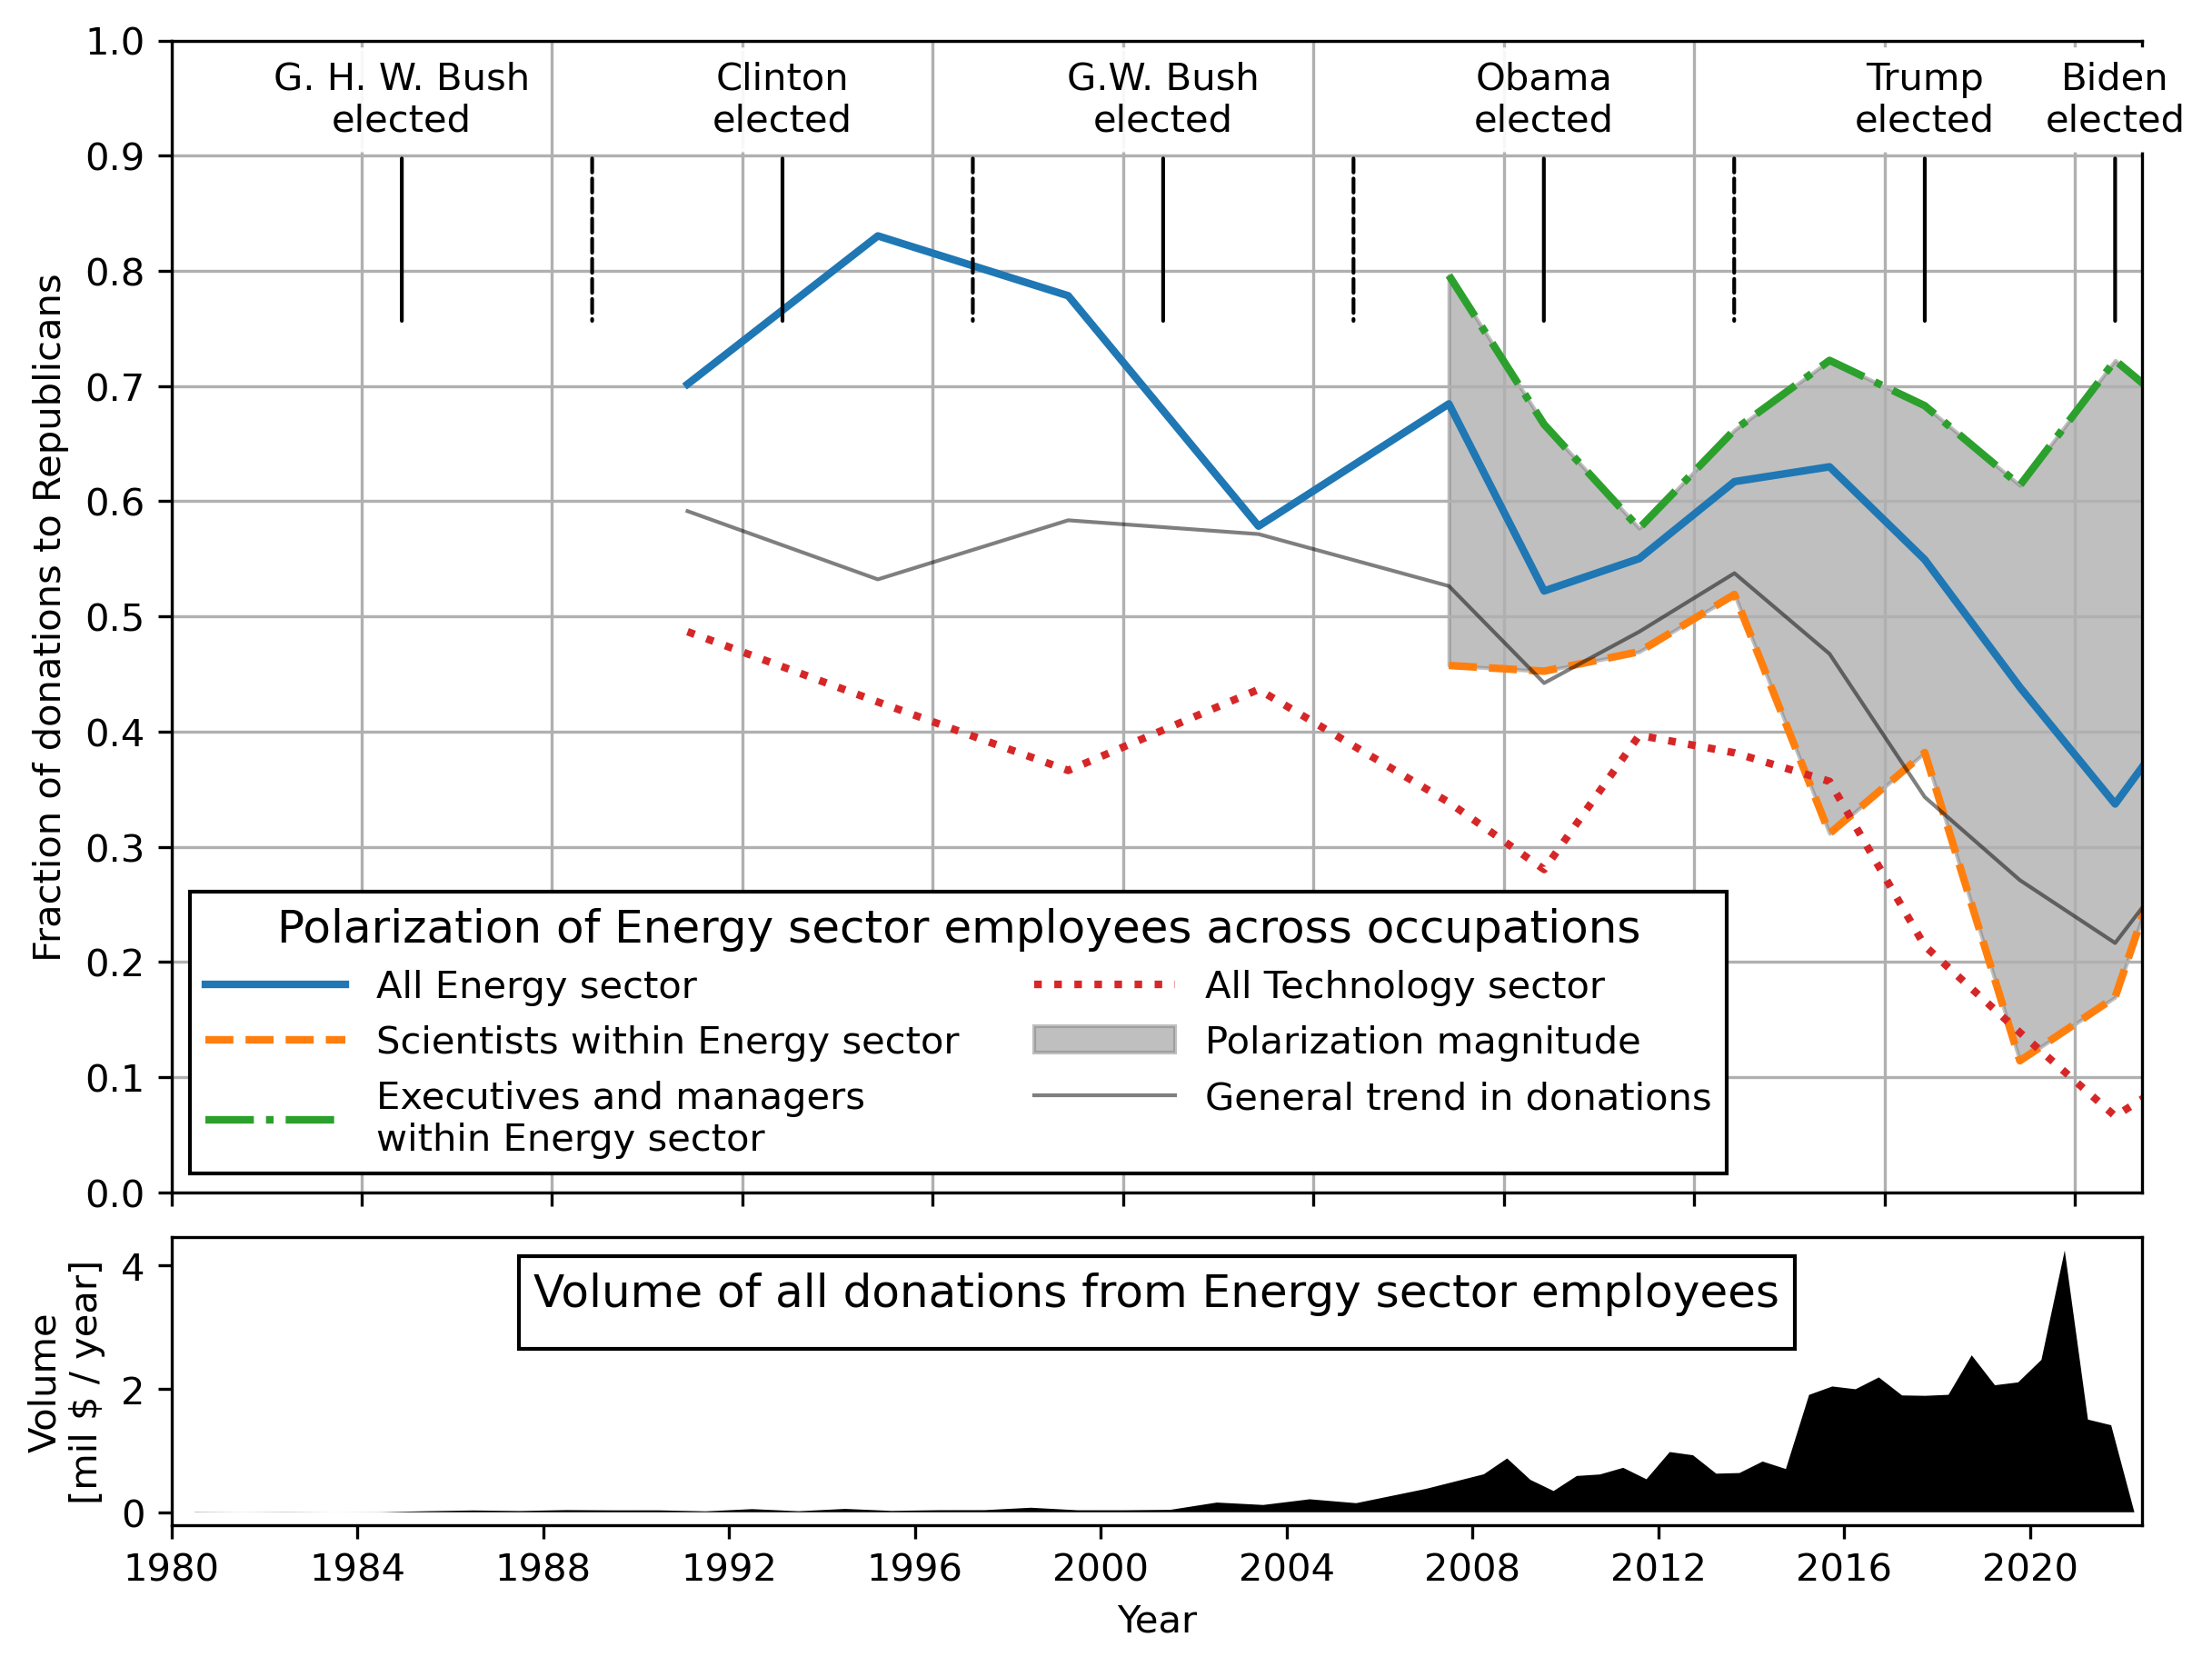

In [162]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(figsize=(8,6), constrained_layout=True, dpi=300)

gs = GridSpec(2, 1, height_ratios=[4, 1], figure=fig)
ax = fig.add_subplot(gs[0])

labels = ['All Energy sector', 'Scientists within Energy sector', 'Executives and managers\nwithin Energy sector', 'All Technology sector']

a = [1, 1,1,1]

line_style = ['-', '--', '-.', ':']

for f in [0,1,2,3]:
    plt.plot(xx2[f], yy2[f], line_style[f], label=labels[f], alpha=a[f], lw=2)
    
    
plt.fill_between(xx2[1], yy2[1], yy2[2], color='gray', alpha=0.5, label = 'Polarization magnitude')


plt.plot(xx2[4], yy2[4], 'k-', lw=1, label="General trend in donations", alpha=0.5)


ax.annotate("G. H. W. Bush\nelected", xy=(datetime.datetime(1984,11,4), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='w'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '-',), textcoords="offset points", 
             horizontalalignment="center",
             verticalalignment="bottom")
ax.annotate("", xy=(datetime.datetime(1988,11,4), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")


ax.annotate("Clinton\nelected", xy=(datetime.datetime(1992,11,4), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='w'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '-',), textcoords="offset points", 
             horizontalalignment="center",
             verticalalignment="bottom")
ax.annotate("", xy=(datetime.datetime(1996,11,4), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")

ax.annotate("G.W. Bush\nelected", xy=(datetime.datetime(2000,11,4), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='w'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '-',), textcoords="offset points", 
             horizontalalignment="center",
             verticalalignment="bottom")
ax.annotate("", xy=(datetime.datetime(2004,11,4), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")

ax.annotate("Obama\nelected", xy=(datetime.datetime(2008,11,4), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='w'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k'), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")
ax.annotate("", xy=(datetime.datetime(2012,11,4), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='w'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")


ax.annotate("Trump\nelected", xy=(datetime.datetime(2016,11,6), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=1, fc='w',ec='w'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k'), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")

ax.annotate("Biden\nelected", xy=(datetime.datetime(2020,11,6), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=1, fc='w',ec='w'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k'), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")

plt.ylim([0,1])

plt.yticks(np.arange(0,1.01,0.1))

plt.xticks([datetime.datetime(1980,1,1) + i * relativedelta(months=48) for i in np.arange(0,11)],
          ["" for i in np.arange(1980,2022,4)])
plt.xlim([datetime.datetime(1980,1,1), datetime.datetime(2021,6,1)])

plt.ylabel('Fraction of donations to Republicans')


plt.grid()
# plt.legend(loc=3, facecolor=(1, 1, 1, 1), prop={'size': 11}, handlelength = 3.7)

plt.legend(loc=3, facecolor=(1, 1, 1, 1), prop={'size': 10}, handlelength = 3.7, ncol=2,
          title='Polarization of Energy sector employees across occupations', fancybox=False, framealpha=1, edgecolor='0',
          title_fontproperties = {'size': 12})


# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[1])


temp = [datetime.datetime(1980,1,1) + relativedelta(months=i) for i in np.arange(0,12*26+1,12)]
temp += [temp[-1] + relativedelta(months=i) for i in np.arange(24,12*50+1,6)]

bins = np.array(temp, dtype='datetime64')

H,X =np.histogram(z['DATE'], weights = np.array(z['TRANSACTION_AMT']).astype(float),
                 bins = bins)

plt.fill_between(X[:-1]+np.diff(X)/2., H /1e6 / (np.diff(X.astype(float))/3600/24/1e6/365),
                 alpha=1, facecolor='k')
# plt.yscale('log')

plt.xticks([datetime.datetime(1980,1,1) + i * relativedelta(months=48) for i in np.arange(0,11)],
          [str(i) for i in np.arange(1980,2022,4)])
plt.xlim([datetime.datetime(1980,1,1), datetime.datetime(2022,6,1)])

# fig.suptitle("GridSpec")
# format_axes(fig)

plt.xlabel('Year')
plt.ylabel('Volume\n[mil $ / year]')

plt.legend(loc='upper center', facecolor=(1, 1, 1, 1), prop={'size': 10}, handlelength = 3.7, ncol=2,
          title='Volume of all donations from Energy sector employees', fancybox=False, framealpha=1, edgecolor='0',
          title_fontproperties = {'size': 12})

plt.show()

# plt.step(X[:-1]+np.diff(X)/2., H/3.5e7,c='k')


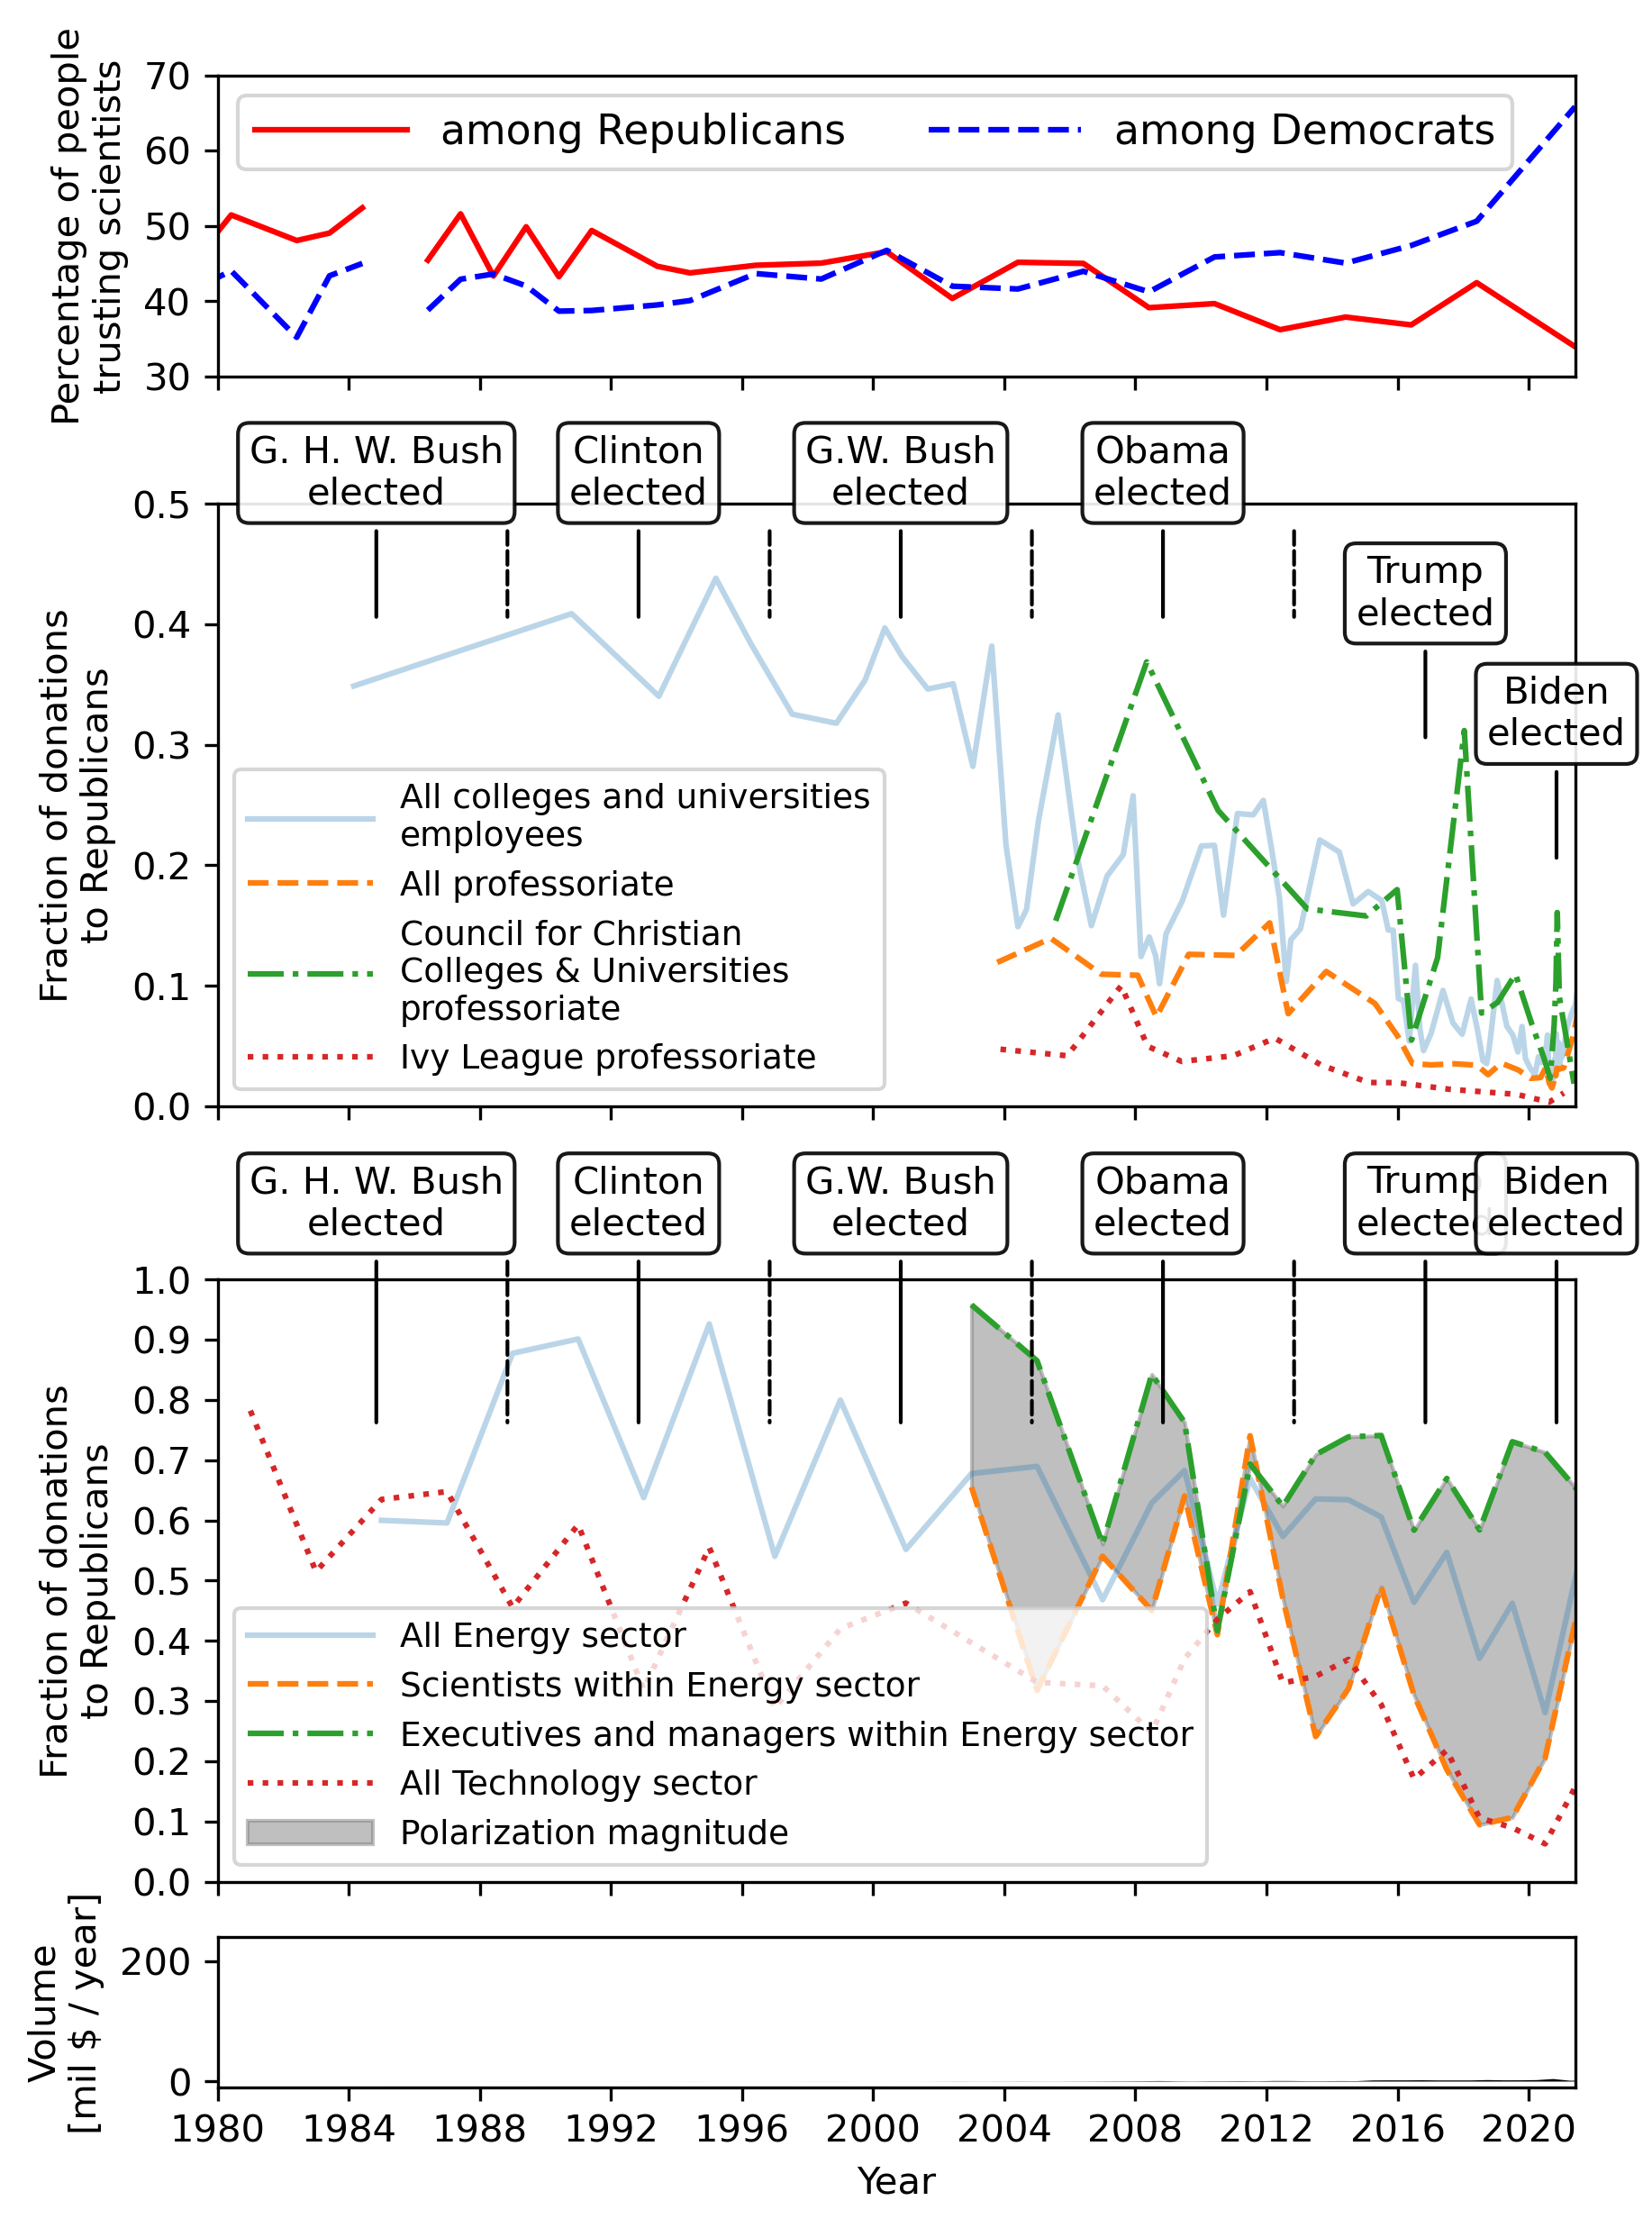

In [35]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

plt.rcParams['axes.facecolor']='white'

def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(figsize=(6,8), constrained_layout=True, dpi=300)

gs = GridSpec(4, 1, height_ratios=[2, 4, 4, 1], figure=fig)

ax = fig.add_subplot(gs[0])

ax.plot([datetime.datetime(i,6,1) for i in gss_sum_year], gss_sum_res[:,1]*100, '-r', label='among Republicans')
ax.plot([datetime.datetime(i,6,1) for i in gss_sum_year], gss_sum_res[:,2]*100, '--b', label='among Democrats')

plt.legend(loc=2, ncol=2, facecolor=(1, 1, 1, 1), prop={'size': 11}, handlelength = 3.7)

plt.ylim([30, 70])
plt.yticks([30,40,50,60,70])

plt.xlim([datetime.datetime(1980,1,1), datetime.datetime(2021,6,1)])
plt.xticks([datetime.datetime(1980,1,1) + i * relativedelta(months=48) for i in np.arange(0,11)],
          ["" for i in np.arange(1980,2022,4)])


plt.ylabel('Percentage of people\ntrusting scientists')


ax = fig.add_subplot(gs[1])


labels = ['All colleges and universities\nemployees', 'All professoriate', 
          'Council for Christian\nColleges & Universities\nprofessoriate', 
          'Ivy League professoriate', 'National Labs']
a = [0.3, 1,1,1]

line_style = ['-', '--', '-.', ':']

for f in range(4):
    plt.plot(xx[f], yy[f], line_style[f], label=labels[f], alpha=a[f])




ax.annotate("G. H. W. Bush\nelected", xy=(datetime.datetime(1984,11,4), 0.4), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '-',), textcoords="offset points", 
             horizontalalignment="center",
             verticalalignment="bottom")
ax.annotate("", xy=(datetime.datetime(1988,11,4), 0.4), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")


ax.annotate("Clinton\nelected", xy=(datetime.datetime(1992,11,4), 0.4), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '-',), textcoords="offset points", 
             horizontalalignment="center",
             verticalalignment="bottom")
ax.annotate("", xy=(datetime.datetime(1996,11,4), 0.4), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")

ax.annotate("G.W. Bush\nelected", xy=(datetime.datetime(2000,11,4), 0.4), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '-',), textcoords="offset points", 
             horizontalalignment="center",
             verticalalignment="bottom")
ax.annotate("", xy=(datetime.datetime(2004,11,4), 0.4), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")

ax.annotate("Obama\nelected", xy=(datetime.datetime(2008,11,4), 0.4), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k'), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")
ax.annotate("", xy=(datetime.datetime(2012,11,4), 0.4), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")


ax.annotate("Trump\nelected", xy=(datetime.datetime(2016,11,6), 0.3), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k'), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")

ax.annotate("Biden\nelected", xy=(datetime.datetime(2020,11,6), 0.2), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k'), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")

plt.yticks(np.arange(0,1.01,0.1))

plt.ylim([0,0.5])

plt.xticks([datetime.datetime(1980,1,1) + i * relativedelta(months=48) for i in np.arange(0,11)],
          ["" for i in np.arange(1980,2022,4)])
plt.xlim([datetime.datetime(1980,1,1), datetime.datetime(2021,6,1)])

plt.ylabel('Fraction of donations\nto Republicans')



plt.legend(loc=3, facecolor=(1, 1, 1, 1), prop={'size': 9}, handlelength = 3.7)

















ax = fig.add_subplot(gs[2])

labels = ['All Energy sector', 'Scientists within Energy sector', 'Executives and managers within Energy sector', 'All Technology sector']

a = [0.3, 1,1,1]

line_style = ['-', '--', '-.', ':']

for f in range(4):
    plt.plot(xx2[f], yy2[f], line_style[f], label=labels[f], alpha=a[f])
    
    
plt.fill_between(xx2[1], yy2[1], yy2[2], color='gray', alpha=0.5, label = 'Polarization magnitude')
    

ax.annotate("G. H. W. Bush\nelected", xy=(datetime.datetime(1984,11,4), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '-',), textcoords="offset points", 
             horizontalalignment="center",
             verticalalignment="bottom")
ax.annotate("", xy=(datetime.datetime(1988,11,4), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")


ax.annotate("Clinton\nelected", xy=(datetime.datetime(1992,11,4), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '-',), textcoords="offset points", 
             horizontalalignment="center",
             verticalalignment="bottom")
ax.annotate("", xy=(datetime.datetime(1996,11,4), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")

ax.annotate("G.W. Bush\nelected", xy=(datetime.datetime(2000,11,4), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '-',), textcoords="offset points", 
             horizontalalignment="center",
             verticalalignment="bottom")
ax.annotate("", xy=(datetime.datetime(2004,11,4), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")

ax.annotate("Obama\nelected", xy=(datetime.datetime(2008,11,4), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k'), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")
ax.annotate("", xy=(datetime.datetime(2012,11,4), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")


ax.annotate("Trump\nelected", xy=(datetime.datetime(2016,11,6), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k'), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")

ax.annotate("Biden\nelected", xy=(datetime.datetime(2020,11,6), 0.75), xytext=(0, 50),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k'), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")

plt.ylim([0,1])

plt.yticks(np.arange(0,1.01,0.1))

plt.xticks([datetime.datetime(1980,1,1) + i * relativedelta(months=48) for i in np.arange(0,11)],
          ["" for i in np.arange(1980,2022,4)])
plt.xlim([datetime.datetime(1980,1,1), datetime.datetime(2021,6,1)])

plt.ylabel('Fraction of donations\nto Republicans')



plt.legend(loc=3, facecolor=(1, 1, 1, 1), prop={'size': 9}, handlelength = 3.7)














# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[3])


temp = [datetime.datetime(1980,1,1) + relativedelta(months=i) for i in np.arange(0,12*26+1,12)]
temp += [temp[-1] + relativedelta(months=i) for i in np.arange(24,12*50+1,6)]

bins = np.array(temp, dtype='datetime64')

H,X =np.histogram(z['DATE'], weights = np.array(z['TRANSACTION_AMT']).astype(float),
                 bins = bins)

plt.fill_between(X[:-1]+np.diff(X)/2., H /1e6 / (np.diff(X.astype(float))/3600/24/1e6/365),
                 alpha=1, facecolor='k', label='Volume')
# plt.yscale('log')

plt.xticks([datetime.datetime(1980,1,1) + i * relativedelta(months=48) for i in np.arange(0,11)],
          [str(i) for i in np.arange(1980,2022,4)])
plt.xlim([datetime.datetime(1980,1,1), datetime.datetime(2021,6,1)])
plt.ylim([-10,240])
# fig.suptitle("GridSpec")
# format_axes(fig)

plt.xlabel('Year')
plt.ylabel('Volume\n[mil $ / year]')

plt.show()

# plt.step(X[:-1]+np.diff(X)/2., H/3.5e7,c='k')

(0.0, 1.0)

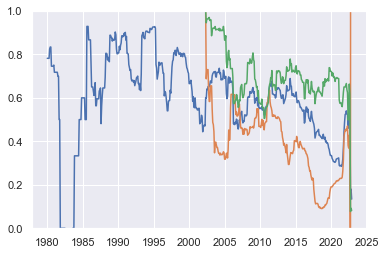

In [222]:
for f in range(3):
    df_all = pd.read_parquet(files[0])

    df_all = df_all.reset_index(drop=True)
    df_all = df_all.drop(df_all.index[df_all['TRANSACTION_DT'] == 'FL'])
    df_all = df_all.drop(df_all.index[df_all['TRANSACTION_DT'] == ''])

    df_all['DATE'] = [datetime.datetime.strptime(str(i), '%m%d%Y') for i in (df_all['TRANSACTION_DT']).astype(str)]

    df_all = df_all.sort_values(by=['DATE'])

    df_all.loc[df_all['CMTE_NM'] == 'ACTBLUE', 'CMTE_PTY_AFFILIATION'] = 'DEM'
    df_all.loc[df_all['CMTE_NM'] == 'MOVEON.ORG POLITICAL ACTION', 'CMTE_PTY_AFFILIATION'] = 'DEM'

    if f==1:
        df_all = df_all[df_all['OCCUPATION'].str.contains("|".join(['ENGINEER', 'GEOLOGIST', 'CHEMIST', 'GEOPHYSICIST', 'SCIENTIST', 'PROFESSOR', 'RESEARCH']), 
                                     case = False)]
    if f==2:
        df_all = df_all[df_all['OCCUPATION'].str.contains("|".join(['SUPERVISOR', 'CHAIRMAN', 'CEO', 'COO', 'VP', 'EXECUTIVE', 'PRESIDENT']), 
                                     case = False)]
    
    temp = df_all['DATE'][df_all['CMTE_PTY_AFFILIATION'] == 'DEM']
    temp_w = np.array(df_all['TRANSACTION_AMT'][df_all['CMTE_PTY_AFFILIATION'] == 'DEM']).astype(float)

    temp2 = df_all['DATE'][df_all['CMTE_PTY_AFFILIATION'] == 'REP']
    temp2_w = np.array(df_all['TRANSACTION_AMT'][df_all['CMTE_PTY_AFFILIATION'] == 'REP']).astype(float)


    bins = np.array([datetime.datetime(1980,1,1) + relativedelta(months=i) for i in np.arange(0,12*100+1,1)])

    res = np.zeros(len(bins))

    for i in range(len(bins)):
        w = relativedelta(months=12)
        res[i] = np.sum(temp2_w[(temp2>bins[i]-w) & (temp2<bins[i]+w)]) / (np.sum(temp_w[(temp>bins[i]-w) & (temp<bins[i]+w)]) + np.sum(temp2_w[(temp2>bins[i]-w) & (temp2<bins[i]+w)]))
        
    plt.plot(bins, res)

plt.ylim([0,1])
plt.xlim([0,1])

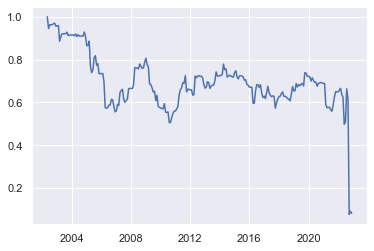

In [2]:
import pandas as pd
import numpy as np

In [52]:
elect = pd.read_csv('1976-2020-president.csv')

In [102]:
elect

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,56,83,68,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,20210113,NaN,LIBERTARIAN
4283,2020,WYOMING,WY,56,83,68,US PRESIDENT,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,20210113,NaN,OTHER
4284,2020,WYOMING,WY,56,83,68,US PRESIDENT,NaN,NaN,True,1739,278503,20210113,NaN,OTHER
4285,2020,WYOMING,WY,56,83,68,US PRESIDENT,OVERVOTES,NaN,False,279,278503,20210113,NaN,OTHER


In [58]:
elect_states = np.unique(elect['state_po'])
elect_years = np.unique(elect['year'])

In [106]:
len(elect_states)

51

In [103]:
elect_res = np.zeros([len(elect_states), len(elect_years)])
population_res = np.zeros([len(elect_states), len(elect_years)])

for i in range(len(elect_states)):
    for j in range(len(elect_years)):
        temp = elect[(elect['state_po'] == elect_states[i]) & (elect['year'] == elect_years[j]) & (elect['party_detailed'] == 'REPUBLICAN')]
        elect_res[i, j] = 1.0 * temp['candidatevotes'].sum() / temp['totalvotes'].mean()
        population_res[i, j] = temp['totalvotes'].mean()
    

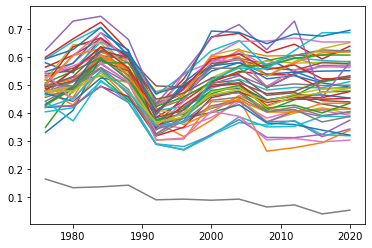

In [104]:
_ = plt.plot(elect_years, elect_res.T)

146596
2523


In [5]:
# files = ['data/selections/colleges_and_universities.parquet']

df_all = pd.read_parquet('data/selections/colleges_and_universities.parquet')

df_all = df_all.reset_index(drop=True)
df_all = df_all.drop(df_all.index[df_all['TRANSACTION_DT'] == 'FL'])
df_all = df_all.drop(df_all.index[df_all['TRANSACTION_DT'] == ''])

OCCUPATION_dict = ['professor', 'faculty', 'SCIENTIST', 'LECTURER']
df_all = df_all[df_all['OCCUPATION'].str.contains("|".join(OCCUPATION_dict), 
                                         case = False)]

53185      55127
53189      55405
53191      89509
53192      95616
53195      55408
           ...  
3277682    08904
3277687    38305
3277691    79925
3277696    38654
3277697    84057
Name: ZIP_CODE, Length: 1540015, dtype: object


In [143]:
df_all['DATE'] = [datetime.datetime.strptime(str(i), '%m%d%Y') for i in (df_all['TRANSACTION_DT']).astype(str)]

In [166]:
polit_res = np.zeros([len(elect_states), len(elect_years)])
for i in range(len(elect_states)):
    for j in range(len(elect_years)):
        st = elect_states[i]
        filt = (df_all['DATE'] < datetime.datetime(elect_years[j],11,6)) & \
               (df_all['DATE'] > datetime.datetime(elect_years[j]-4,11,6)) & \
               (df_all['STATE'] == st)
        df_temp = df_all[filt]
        rep_temp = df_temp[df_temp['CMTE_PTY_AFFILIATION'] == 'REP']['TRANSACTION_AMT'].sum()
        dem_temp = df_temp[df_temp['CMTE_PTY_AFFILIATION'] == 'DEM']['TRANSACTION_AMT'].sum()
        polit_res[i, j] = (rep_temp / (rep_temp + dem_temp))



<ipython-input-166-213b40eb4ff0>:11: RuntimeWarning: invalid value encountered in double_scalars
  polit_res[i, j] = (rep_temp / (rep_temp + dem_temp))


In [167]:
j=7
plt.plot(polit_res[elect_states != 'DC', j], elect_res[elect_states != 'DC', j], '.')
# plt.xlim([0,0.2])

In [188]:
def m(x, w):
    """Weighted Mean"""
    return np.sum(x * w) / np.sum(w)

def cov(x, y, w):
    """Weighted Covariance"""
    return np.sum(w * (x - m(x, w)) * (y - m(y, w))) / np.sum(w)

def corr(x, y, w):
    """Weighted Correlation"""
    return cov(x, y, w) / np.sqrt(cov(x, x, w) * cov(y, y, w))

for j in range(0,12):
    f = (elect_states != 'DC') & (elect_states != 'SC')
    w = population_res[f, j]
    print(elect_years[j]-4,"-",elect_years[j], ":", corr(polit_res[f, j], elect_res[f, j], w))

1972 - 1976 : nan
1976 - 1980 : nan
1980 - 1984 : nan
1984 - 1988 : nan
1988 - 1992 : nan
1992 - 1996 : nan
1996 - 2000 : nan
2000 - 2004 : 0.632726349838018
2004 - 2008 : 0.7153254323937333
2008 - 2012 : 0.6268138784172181
2012 - 2016 : 0.4311508041392418
2016 - 2020 : 0.4260815062061368


In [189]:
def m(x, w):
    """Weighted Mean"""
    return np.sum(x * w) / np.sum(w)

def cov(x, y, w):
    """Weighted Covariance"""
    return np.sum(w * (x - m(x, w)) * (y - m(y, w))) / np.sum(w)

def corr(x, y, w):
    """Weighted Correlation"""
    return cov(x, y, w) / np.sqrt(cov(x, x, w) * cov(y, y, w))

for j in range(0,12):
    f = (elect_states != 'DC') & (elect_states != 'SC')
    w = population_res[f, j]
    print(elect_years[j]-4,"-",elect_years[j], ":", corr(elect_res[f, j]/3., elect_res[f, j], w))

1972 - 1976 : 0.9999999999999999
1976 - 1980 : 0.9999999999999999
1980 - 1984 : 1.0
1984 - 1988 : 1.0000000000000002
1988 - 1992 : 0.9999999999999999
1992 - 1996 : 1.0000000000000002
1996 - 2000 : 0.9999999999999998
2000 - 2004 : 1.0000000000000002
2004 - 2008 : 0.9999999999999998
2008 - 2012 : 1.0
2012 - 2016 : 0.9999999999999999
2016 - 2020 : 1.0


Text(0, 0.5, 'Presedential election results')

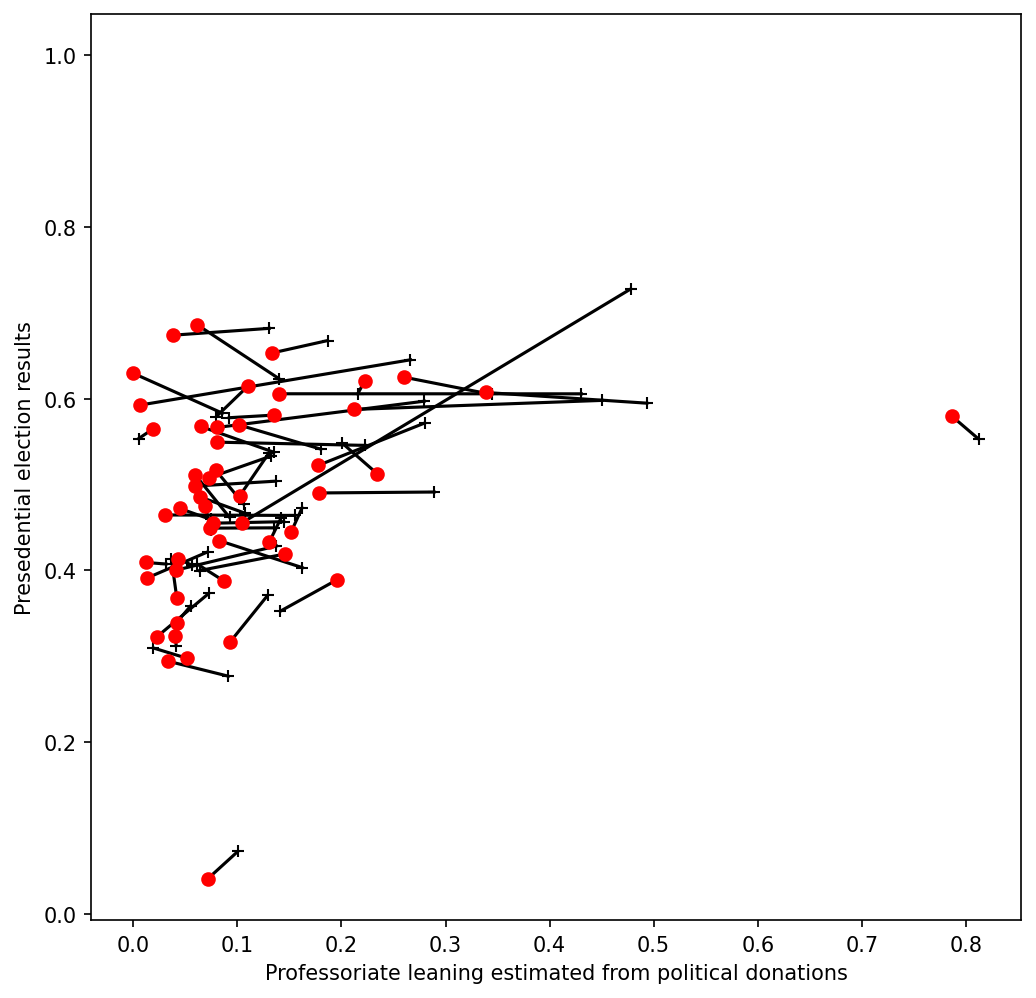

In [173]:
%matplotlib inline

i1 = 9
i2 = 10
plt.figure(figsize=(8,8),dpi=150)
for i in range(len(elect_states)):
#     for j in range(7,12):
        _ = plt.plot(polit_res[elect_states == elect_states[i], i1].T, elect_res[elect_states == elect_states[i], i1].T, '+k')
        _ = plt.plot(polit_res[elect_states == elect_states[i], [i1,i2]].T, elect_res[elect_states == elect_states[i], [i1,i2]].T, '-k')

for i in range(len(elect_states)):
    _ = plt.plot(polit_res[elect_states == elect_states[i], i2].T, elect_res[elect_states == elect_states[i], i2].T, 'or')
        # plt.xlim([0,0.2])
        
plt.plot([0,0], [1,1], 'k')
plt.xlabel("Professoriate leaning estimated from political donations")
plt.ylabel('Presedential election results')

Text(0, 0.5, 'Presedential election results')

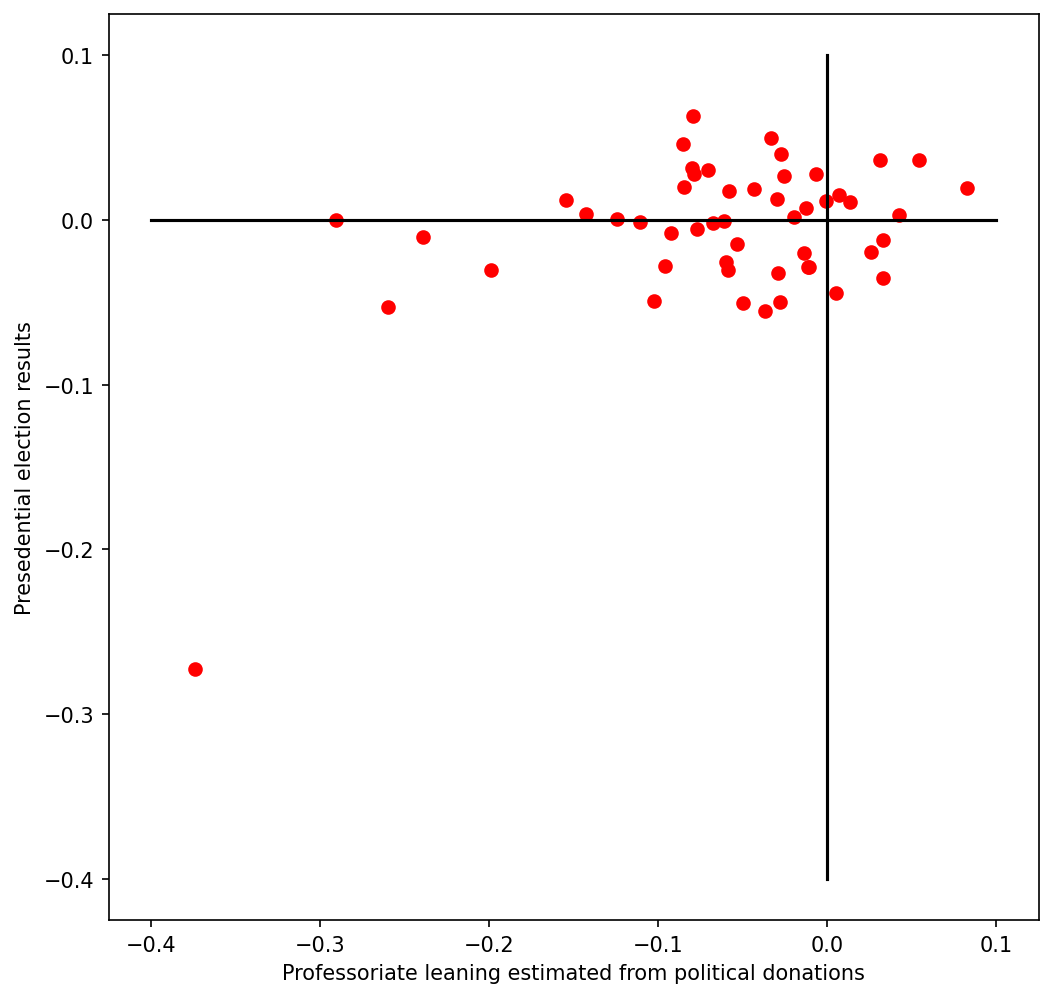

In [186]:
%matplotlib inline

i1 = 9
i2 = 10
plt.figure(figsize=(8,8),dpi=150)
for i in range(len(elect_states)):
        _ = plt.plot(polit_res[elect_states == elect_states[i], i2] - polit_res[elect_states == elect_states[i], i1], 
                     elect_res[elect_states == elect_states[i], i2] - elect_res[elect_states == elect_states[i], i1], 'or')
        
plt.plot([-0.4,0.1], [0,0], 'k')
plt.plot([0,0], [-0.4,0.1], 'k')
plt.xlabel("Professoriate leaning estimated from political donations")
plt.ylabel('Presedential election results')

In [61]:
files = ['data/selections/colleges_and_universities.parquet',
         'data/selections/colleges_and_universities.parquet',
          'data/selections/cccu.parquet',
          'data/selections/ivy_league.parquet',
          'data/selections/nat_lab.parquet']

labels = ['All colleges and universities', 'Council for Christian Colleges & Universities', 'Ivy League', 'National Labs']

xx = []
yy = []

for f in range(0, 1):
    df_all = pd.read_parquet(files[f])

    df_all = df_all.reset_index(drop=True)
    df_all = df_all.drop(df_all.index[df_all['TRANSACTION_DT'] == 'FL'])
    df_all = df_all.drop(df_all.index[df_all['TRANSACTION_DT'] == ''])

    if f==0:
        OCCUPATION_dict = ['professor', 'faculty', 'SCIENTIST', 'LECTURER']
        df_all = df_all[df_all['OCCUPATION'].str.contains("|".join(OCCUPATION_dict), 
                                         case = False)]
        
    
    df_all['DATE'] = [datetime.datetime.strptime(str(i), '%m%d%Y') for i in (df_all['TRANSACTION_DT']).astype(str)]

    df_all = df_all.sort_values(by=['DATE'])

    df_all.loc[df_all['CMTE_NM'] == 'ACTBLUE', 'CMTE_PTY_AFFILIATION'] = 'DEM'
    df_all.loc[df_all['CMTE_NM'] == 'MOVEON.ORG POLITICAL ACTION', 'CMTE_PTY_AFFILIATION'] = 'DEM'

    if f < 2:
        bins = df_all[df_all['CMTE_PTY_AFFILIATION'] == 'REP']['DATE'][::1000]
    else:
        bins = df_all[df_all['CMTE_PTY_AFFILIATION'] == 'REP']['DATE'][::50]
        
    bins = np.array(bins)

    H_DEM,X = np.histogram(df_all['DATE'][df_all['CMTE_PTY_AFFILIATION'] == 'DEM'], 
                           weights = np.array(df_all['TRANSACTION_AMT'][df_all['CMTE_PTY_AFFILIATION'] == 'DEM']).astype(float),
                bins = bins)

    H_REP,X = np.histogram(df_all['DATE'][df_all['CMTE_PTY_AFFILIATION'] == 'REP'], 
                           weights = np.array(df_all['TRANSACTION_AMT'][df_all['CMTE_PTY_AFFILIATION'] == 'REP']).astype(float),
                 bins = bins)

    d_bins = (bins[1:] - bins[:-1]) / np.timedelta64(1, 'D')

    
    if f==0:
        z = df_all.copy()
    
    # ax = plt.subplot(211)
    # plt.plot(X[1:],H_DEM/d_bins,'b')
    # plt.plot(X[1:],H_REP/d_bins,'r')
    # plt.xlim([datetime.datetime(1980,1,1), datetime.datetime(2022,1,1)])
    # # plt.ylim([0,1.2e6])
    # plt.yscale('log')
    # plt.grid()

    # plt.subplot(212, sharex=ax, )

    xx.append(X[:-1]+np.diff(X)/2.)
    yy.append(H_REP / (H_REP + H_DEM))



In [62]:

def clean(s):
    s = unidecode(s)
    s = s.upper()
    s = s.replace('.','')
    s = s.replace('`','')
    s = s.replace('"','')
    s = s.replace("'",'')
    s = s.replace('*','')
    s = s.replace('?','')
    s = s.replace('/',' ')
    s = s.replace('\\','')
    s = s.split(' ')
    if 'MS' in s:
        s.remove('MS')
    if 'MR' in s:
        s.remove('MR')
    if 'Mr' in s:
        s.remove('Mr')
    if 'MRS' in s:
        s.remove('MRS')
    if 'DR' in s:
        s.remove('DR')
    if 'PHD' in s:
        s.remove('PHD')
    if '' in s:
        s.remove('')
    s = ' '.join(s)
    return(s)

uni_names_clean = [clean(s) for s in df_all['NAME']]
# uni_names_clean = np.unique(uni_names_clean)
# uni_names_clean = uni_names_clean[uni_names_clean != '']

def split_name(s):
    s = s.split(',')
    if len(s) > 1:
        return s[0], s[1][1:]
    else:
        return '', ''
    
uni_names_clean = [split_name(s) for s in uni_names_clean]
uni_names_clean = np.array(uni_names_clean)
uni_names_clean = [s[0] +', '+s[1] for s in uni_names_clean]


In [63]:
df_all['CLEAN_NAME'] = uni_names_clean

In [64]:
lookup_subj_area = pd.read_parquet('lookup_subj_area_pd.parquet')

In [65]:
from tqdm import tqdm

In [66]:
lookup_subj_area.reset_index(inplace=True)
lookup_subj_area = lookup_subj_area.rename(columns = {'index':'CLEAN_NAME'})

In [67]:
lookup_subj_area

,CLEAN_NAME,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,COMP,DECI,DENT,...,MATH,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE
0,"A, GILBERT",0.0,0.0,0.000000,0.000000,0.0,0.0,0.142857,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.47619,0.000000,0.000000,0.0
1,"AADALEN, SHARON P",0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.166667,0.0,0.0,0.666667,0.0,0.00000,0.000000,0.000000,0.0
2,"AAGAARD, TODD",0.0,0.0,0.000000,0.157895,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.736842,0.0
3,"AAKER, JENNIFER",0.0,0.0,0.000000,0.524752,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.237624,0.000000,0.0
4,"AALGAARD, ROSS",0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27757,"ZYLAN, YVONNE",0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,1.000000,0.0
27758,"ZYLKIN, THOMAS",0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.230769,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.076923,0.0
27759,"ZYLSTRA, UKO",0.0,0.0,0.333333,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.166667,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.500000,0.0
27760,"ZYPHUR, MICHAEL",0.0,0.0,0.000000,0.531532,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.324324,0.144144,0.0


In [68]:
df = pd.merge(df_all, lookup_subj_area, on='CLEAN_NAME')

In [69]:
df

,CMTE_ID,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CMTE_NM,...,MATH,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE
0,C00193433,"Locker, Kitty Ms.",Worthington,OH,43085,Ohio State University,Professor,8102001,250.0,EMILY'S LIST,...,0.0,0.0,0.000000,0.000,0.0,0.000,0.0,0.000000,0.000000,0.0
1,C00193433,"Locker, Kitty Ms.",Worthington,OH,43085,Ohio State University,Professor,6042002,250.0,EMILY'S LIST,...,0.0,0.0,0.000000,0.000,0.0,0.000,0.0,0.000000,0.000000,0.0
2,C00193433,"Locker, Kitty Ms.",Worthington,OH,43085,Ohio State University,Professor,6042002,250.0,EMILY'S LIST,...,0.0,0.0,0.000000,0.000,0.0,0.000,0.0,0.000000,0.000000,0.0
3,C00193433,"Locker, Kitty Ms.",Worthington,OH,43085,Ohio State University,Professor,6042002,250.0,EMILY'S LIST,...,0.0,0.0,0.000000,0.000,0.0,0.000,0.0,0.000000,0.000000,0.0
4,C00193433,"Locker, Kitty Ms.",Worthington,OH,43085,Ohio State University,Professor,6042002,500.0,EMILY'S LIST,...,0.0,0.0,0.000000,0.000,0.0,0.000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416337,C00010603,"ARMENTO, BEVERLY JEANNE",DUNWOODY,GA,303385747,GEORGIA STATE UNIVERSITY,COLLEGE PROFESSOR,11292021,100.0,DNC SERVICES CORP / DEMOCRATIC NATIONAL COMMITTEE,...,0.0,0.0,0.000000,0.000,0.0,0.000,0.0,0.090909,0.818182,0.0
416338,C00042366,"HERBERT, TIMOTHY D",PROVIDENCE,RI,029063502,BROWN UNIVERSITY,PROFESSOR,11302021,100.0,DSCC,...,0.0,0.0,0.064039,0.000,0.0,0.000,0.0,0.000000,0.000000,0.0
416339,C00010603,"HEYDT, MARGO J.",CINCINNATI,OH,452131111,XAVIER UNIVERSITY,PROFESSOR,11302021,100.0,DNC SERVICES CORP / DEMOCRATIC NATIONAL COMMITTEE,...,0.0,0.0,0.000000,0.000,0.0,0.000,0.0,0.000000,0.666667,0.0
416340,C00114439,"CHAVKIN, CHARLES I.",SEATTLE,WA,98115,UNIVERSITY OF WASHINGTON,PROFESSOR,1252021,1000.0,WASHINGTON STATE DEMOCRATIC CENTRAL COMMITTEE,...,0.0,0.0,0.000000,0.356,0.0,0.232,0.0,0.000000,0.000000,0.0


In [70]:
# datetime.datetime(elect_years[j],11,6))

In [71]:
all_areas = np.array(['AGRI', 'ARTS', 'BIOC', 'BUSI', 'CENG', 'CHEM', 'COMP', 'DECI',
       'DENT', 'EART', 'ECON', 'ENER', 'ENGI', 'ENVI', 'HEAL', 'IMMU',
       'MATE', 'MATH', 'MEDI', 'MULT', 'NEUR', 'NURS', 'PHAR', 'PHYS',
       'PSYC', 'SOCI', 'VETE'])

In [72]:
all_areas_groups = [np.array(['CENG', 'CHEM', 'COMP',
       'EART', 'ENER', 'ENGI', 'ENVI', 
       'MATE', 'MATH', 'PHYS']),
             np.array(['DENT', 'HEAL', 'MEDI', 'NURS', 'VETE']),
             np.array(['ARTS', 'BUSI', 'DECI',
       'ECON', 'PSYC', 'SOCI']),
             np.array(['AGRI', 'BIOC', 'IMMU',
       'NURS', 'PHAR'])]

In [73]:
temp = [datetime.datetime(1980,11,6) + relativedelta(months=i) for i in np.arange(0,12*26+1,48)]
temp += [temp[-1] + relativedelta(months=i) for i in np.arange(24,12*50+1,24)]

bins = np.array(temp, dtype='datetime64')

xx=[]
yy=[]
for f in range(0, 1):
#     bins = [datetime.datetime(i,11,6).timestamp() for i in range(2000,2023)]
        
    bins = np.array(bins)

    for ii in range(4):
        H_DEM_ii = 0
        H_REP_ii = 0
        for i in all_areas_groups[ii]:
            H_DEM,X = np.histogram(df['DATE'][df['CMTE_PTY_AFFILIATION'] == 'DEM'], 
                                   weights = np.array(df['TRANSACTION_AMT'][df['CMTE_PTY_AFFILIATION'] == 'DEM']).astype(float) * \
                                   df[i][df['CMTE_PTY_AFFILIATION'] == 'DEM'],
                        bins = bins)

            H_REP,X = np.histogram(df['DATE'][df['CMTE_PTY_AFFILIATION'] == 'REP'], 
                                   weights = np.array(df['TRANSACTION_AMT'][df['CMTE_PTY_AFFILIATION'] == 'REP']).astype(float) * \
                                   df[i][df['CMTE_PTY_AFFILIATION'] == 'REP'],
                         bins = bins)
            H_DEM_ii = H_DEM + H_DEM_ii
            H_REP_ii = H_REP + H_REP_ii
#         d_bins = (bins[1:] - bins[:-1]) / np.timedelta64(1, 'D')

        xx.append(X[:-1]+np.diff(X))
        yy.append(H_REP_ii / (H_REP_ii + H_DEM_ii + 0.01))


In [74]:
bins = df_all[df_all['CMTE_PTY_AFFILIATION'] == 'REP']['DATE'][::1000]

H_DEM,X = np.histogram(df_all['DATE'][df_all['CMTE_PTY_AFFILIATION'] == 'DEM'], 
                       weights = np.array(df_all['TRANSACTION_AMT'][df_all['CMTE_PTY_AFFILIATION'] == 'DEM']).astype(float),
            bins = bins)

H_REP,X = np.histogram(df_all['DATE'][df_all['CMTE_PTY_AFFILIATION'] == 'REP'], 
                       weights = np.array(df_all['TRANSACTION_AMT'][df_all['CMTE_PTY_AFFILIATION'] == 'REP']).astype(float),
             bins = bins)

xx.append(X[:-1]+np.diff(X))
yy.append(H_REP / (H_REP + H_DEM + 0.01))

In [75]:
np.sum(np.array(df['TRANSACTION_AMT'][df['CMTE_PTY_AFFILIATION'] == 'DEM']).astype(float) * \
                               df[i][df['CMTE_PTY_AFFILIATION'] == 'DEM'])

230589.7454705434

In [76]:
yy

[array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.1104309 , 0.16365945, 0.08020479, 0.06837027, 0.15211587,
        0.03047795, 0.02197915, 0.02113441, 0.02403603, 0.06356272,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.11963951, 0.09101582, 0.0874615 , 0.06403846, 0.10080515,
        0.06593763, 0.03769508, 0.03889416, 0.01960943, 0.03080921,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07212631, 0.06693472, 0.064959  , 0.09104078, 0.09559698,
    

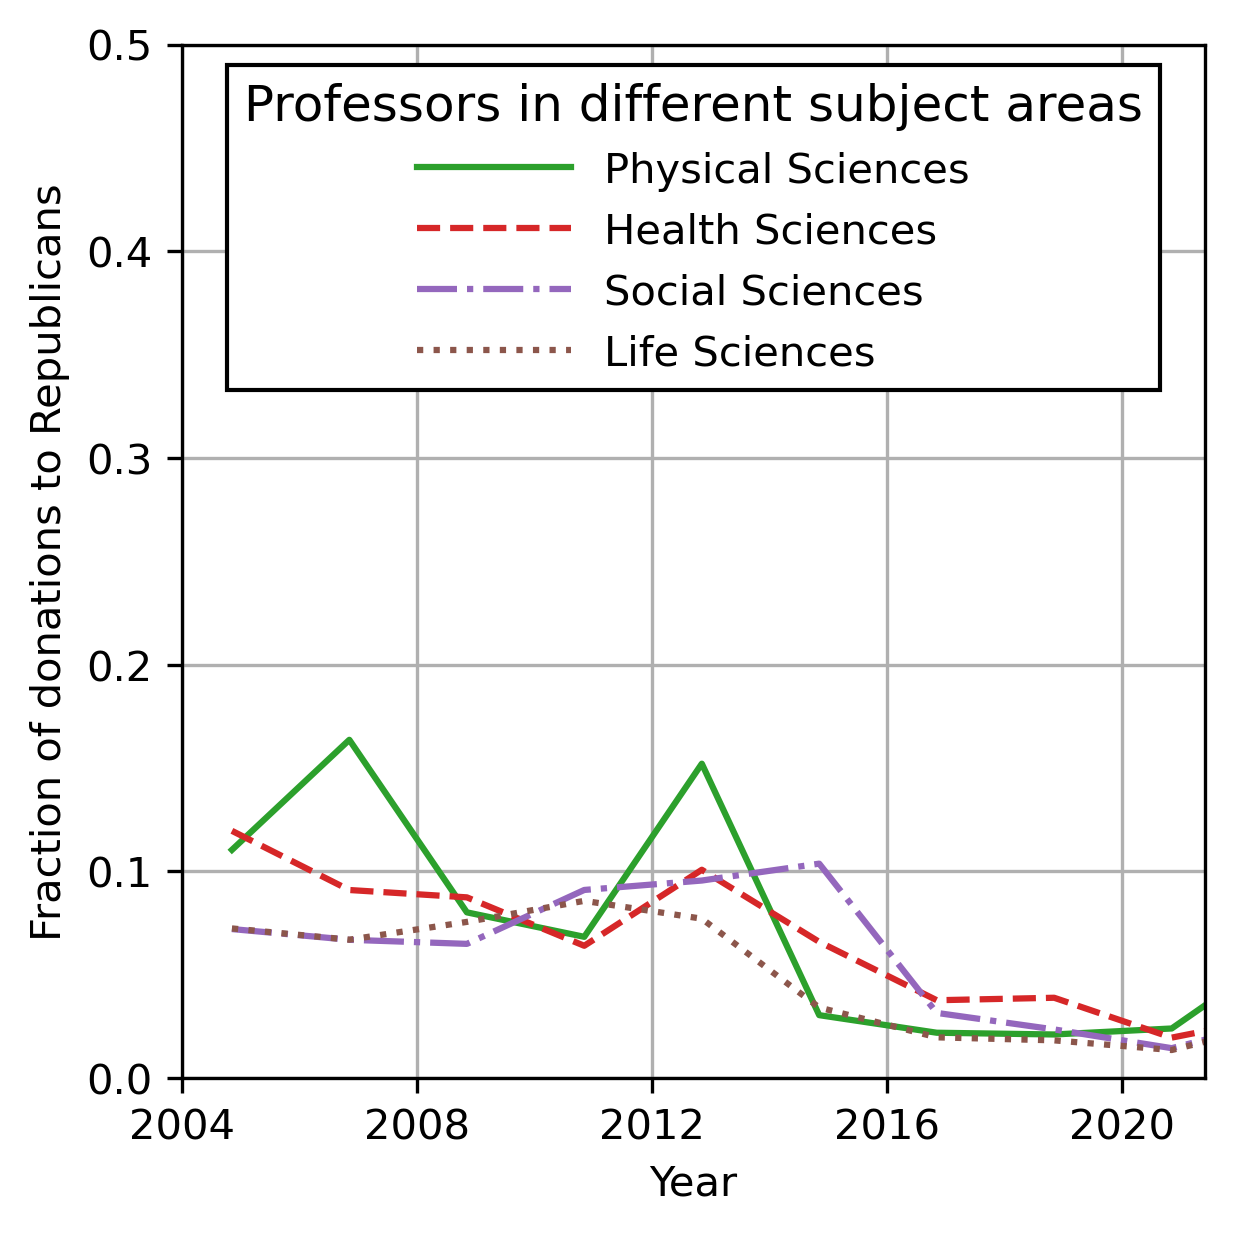

In [84]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

plt.rcParams['axes.facecolor']='white'

def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(figsize=(4,4), constrained_layout=True, dpi=300)

gs = GridSpec(1, 1, height_ratios=[1], figure=fig)

# ax = fig.add_subplot(gs[0])

# ax.plot([datetime.datetime(i,6,1) for i in gss_sum_year], gss_sum_res[:,1]*100, '-r', label='among Republicans')
# ax.plot([datetime.datetime(i,6,1) for i in gss_sum_year], gss_sum_res[:,2]*100, '--b', label='among Democrats')

# plt.legend(loc=2, ncol=2, facecolor=(1, 1, 1, 1), prop={'size': 11}, handlelength = 3.7)

# plt.ylim([30, 70])
# plt.yticks([30,40,50,60,70])

# plt.xlim([datetime.datetime(1980,1,1), datetime.datetime(2021,6,1)])
# plt.xticks([datetime.datetime(1980,1,1) + i * relativedelta(months=48) for i in np.arange(0,11)],
#           ["" for i in np.arange(1980,2022,4)])


# plt.ylabel('Percentage of people\ntrusting scientific community')


ax = fig.add_subplot(gs[0])


labels=['Physical Sciences', 'Health Sciences', 'Social Sciences', 'Life Sciences']

a = [1, 1,1,1,1]

line_style = ['-', '--', '-.', ':','-']

# f=5
# plt.plot(xx[f][:], yy[f][:], '--', label='All professoriate', lw=4, alpha=0.5, 
#          color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])

for f in range(4):
    plt.plot(xx[f][5:], yy[f][5:], line_style[f], label=labels[f], alpha=a[f], 
             color=plt.rcParams['axes.prop_cycle'].by_key()['color'][f+2])




plt.yticks(np.arange(0,1.01,0.1))

plt.ylim([0,0.5])

plt.xticks([datetime.datetime(1980,1,1) + i * relativedelta(months=48) for i in np.arange(0,11)],
          ["" for i in np.arange(1980,2022,4)])
plt.xlim([datetime.datetime(1980,1,1), datetime.datetime(2021,6,1)])

plt.ylabel('Fraction of donations to Republicans')



# plt.legend(loc=1, facecolor=(1, 1, 1, 1), prop={'size': 11}, handlelength = 3.7)


plt.legend(loc='upper center', facecolor=(1, 1, 1, 1), prop={'size': 10}, handlelength = 3.7, ncol=1,
          title='Professors in different subject areas', fancybox=False, framealpha=1, edgecolor='0',
          title_fontproperties = {'size': 12})

# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
# ax2 = fig.add_subplot(gs[2])


# temp = [datetime.datetime(1980,1,1) + relativedelta(months=i) for i in np.arange(0,12*26+1,12)]
# temp += [temp[-1] + relativedelta(months=i) for i in np.arange(24,12*50+1,6)]

# bins = np.array(temp, dtype='datetime64')

# H,X =np.histogram(z['DATE'], weights = np.array(z['TRANSACTION_AMT']).astype(float),
#                  bins = bins)

# plt.fill_between(X[:-1]+np.diff(X)/2., H /1e6 / (np.diff(X.astype(float))/3600/24/1e6/365),
#                  alpha=1, facecolor='k', label='Volume')
# # plt.yscale('log')

plt.xticks([datetime.datetime(1980,1,1) + i * relativedelta(months=48) for i in np.arange(0,11)],
          [str(i) for i in np.arange(1980,2022,4)])
plt.xlim([datetime.datetime(2004,1,1), datetime.datetime(2021,6,1)])
# plt.ylim([-10,240])
# fig.suptitle("GridSpec")
# format_axes(fig)
plt.grid()
plt.xlabel('Year')
# plt.ylabel('Volume\n[mil $ / year]')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

plt.rcParams['axes.facecolor']='white'

def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(figsize=(8,8), constrained_layout=True, dpi=300)

gs = GridSpec(3, 1, height_ratios=[2, 4, 1], figure=fig)

ax = fig.add_subplot(gs[0])

ax.plot([datetime.datetime(i,6,1) for i in gss_sum_year], gss_sum_res[:,1]*100, '-r', label='among Republicans')
ax.plot([datetime.datetime(i,6,1) for i in gss_sum_year], gss_sum_res[:,2]*100, '--b', label='among Democrats')

plt.legend(loc=2, ncol=2, facecolor=(1, 1, 1, 1), prop={'size': 11}, handlelength = 3.7)

plt.ylim([30, 70])
plt.yticks([30,40,50,60,70])

plt.xlim([datetime.datetime(1980,1,1), datetime.datetime(2021,6,1)])
plt.xticks([datetime.datetime(1980,1,1) + i * relativedelta(months=48) for i in np.arange(0,11)],
          ["" for i in np.arange(1980,2022,4)])


plt.ylabel('Percentage of people\ntrusting scientific community')


ax = fig.add_subplot(gs[1])


labels = ['All colleges and universities\nemployees', 'All professoriate', 
          'Council for Christian\nColleges & Universities\nprofessoriate', 
          'Ivy League professoriate', 'National Labs']
a = [0.3, 1,1,1]

line_style = ['-', '--', '-.', ':']

for f in range(4):
    plt.plot(xx[f], yy[f], line_style[f], label=labels[f], alpha=a[f])




ax.annotate("G. H. W. Bush\nelected", xy=(datetime.datetime(1984,11,4), 0.4), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '-',), textcoords="offset points", 
             horizontalalignment="center",
             verticalalignment="bottom")
ax.annotate("", xy=(datetime.datetime(1988,11,4), 0.4), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")


ax.annotate("Clinton\nelected", xy=(datetime.datetime(1992,11,4), 0.4), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '-',), textcoords="offset points", 
             horizontalalignment="center",
             verticalalignment="bottom")
ax.annotate("", xy=(datetime.datetime(1996,11,4), 0.4), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")

ax.annotate("G.W. Bush\nelected", xy=(datetime.datetime(2000,11,4), 0.4), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '-',), textcoords="offset points", 
             horizontalalignment="center",
             verticalalignment="bottom")
ax.annotate("", xy=(datetime.datetime(2004,11,4), 0.4), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")

ax.annotate("Obama\nelected", xy=(datetime.datetime(2008,11,4), 0.4), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k'), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")
ax.annotate("", xy=(datetime.datetime(2012,11,4), 0.4), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k', linestyle = '--',), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")


ax.annotate("Trump\nelected", xy=(datetime.datetime(2016,11,6), 0.3), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k'), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")

ax.annotate("Biden\nelected", xy=(datetime.datetime(2020,11,6), 0.2), xytext=(0, 30),
             bbox=dict(boxstyle="round", alpha=0.9, fc='w',ec='k'),
            arrowprops=dict(arrowstyle="-", lw=1, color='k'), textcoords="offset points", 
                horizontalalignment="center",
                verticalalignment="bottom")

plt.yticks(np.arange(0,1.01,0.1))

plt.ylim([0,0.5])

plt.xticks([datetime.datetime(1980,1,1) + i * relativedelta(months=48) for i in np.arange(0,11)],
          ["" for i in np.arange(1980,2022,4)])
plt.xlim([datetime.datetime(1980,1,1), datetime.datetime(2021,6,1)])

plt.ylabel('Fraction of donations to Republicans')



plt.legend(loc=3, facecolor=(1, 1, 1, 1), prop={'size': 11}, handlelength = 3.7)


# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[2])


temp = [datetime.datetime(1980,1,1) + relativedelta(months=i) for i in np.arange(0,12*26+1,12)]
temp += [temp[-1] + relativedelta(months=i) for i in np.arange(24,12*50+1,6)]

bins = np.array(temp, dtype='datetime64')

H,X =np.histogram(z['DATE'], weights = np.array(z['TRANSACTION_AMT']).astype(float),
                 bins = bins)

plt.fill_between(X[:-1]+np.diff(X)/2., H /1e6 / (np.diff(X.astype(float))/3600/24/1e6/365),
                 alpha=1, facecolor='k', label='Volume')
# plt.yscale('log')

plt.xticks([datetime.datetime(1980,1,1) + i * relativedelta(months=48) for i in np.arange(0,11)],
          [str(i) for i in np.arange(1980,2022,4)])
plt.xlim([datetime.datetime(1980,1,1), datetime.datetime(2021,6,1)])
plt.ylim([-10,240])
# fig.suptitle("GridSpec")
# format_axes(fig)

plt.xlabel('Year')
plt.ylabel('Volume\n[mil $ / year]')

plt.show()

# plt.step(X[:-1]+np.diff(X)/2., H/3.5e7,c='k')